In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr,spearmanr
sns.set(style="darkgrid", color_codes=True, font_scale=1.33)

In [2]:
# load internal and external data
gnomad = pd.read_table('/oak/stanford/groups/jpriest/cnv_ukb/resources/constraint/constraint_gnomad-v2.1.tsv',
                       usecols=['gene', 'lof_z', 'mis_z', 'syn_z', 'pLI'], index_col='gene')
# note: gnomad uses ENSG encoding, so there are duplicates
exac = pd.read_table('/oak/stanford/groups/jpriest/cnv_ukb/resources/constraint/exac-final-cnv.gene.scores071316.txt',
                     sep='\s+', usecols=['gene_symbol', 'del.score', 'dup.score', 'cnv.score'], index_col='gene_symbol')

ukb_all = pd.read_table('../constraint/cnv_constraint_zscores_20190430.tsv',
                        header=None, names=['gene', 'ukb_z', 'ukb_pli'], index_col=0)

ukb_del = pd.read_table('../constraint/cnv_del_zscores_20190430.tsv',
                        header=None, names=['gene', 'ukb_del_z', 'ukb_del_pli'], index_col=0)

ukb_dup = pd.read_table('../constraint/cnv_dup_zscores_20190430.tsv',
                        header=None, names=['gene', 'ukb_dup_z', 'ukb_dup_pli'], index_col=0)

df = reduce(lambda x,y: pd.merge(x, y, left_index=True, right_index=True), 
            [gnomad, exac, ukb_all, ukb_del, ukb_dup])

df.index.names = ['Gene']
df.describe()

lof_z         mis_z         syn_z            pLI     del.score  \
count  63804.000000  64825.000000  64822.000000   6.380400e+04  64836.000000   
mean       2.123690      0.888054     -0.066972   2.933350e-01      0.036071   
std        1.877960      1.171712      1.153944   3.830979e-01      1.019608   
min       -8.477200    -11.321000    -19.154000  7.896500e-156     -2.623544   
25%        0.889053      0.179070     -0.581050   1.832700e-05     -0.354369   
50%        1.810200      0.696370      0.057697   3.234750e-02      0.291099   
75%        3.047875      1.447500      0.636720   6.140175e-01      0.703503   
max       15.032000     11.370000      4.700700   1.000000e+00      3.813059   

          dup.score     cnv.score         ukb_z       ukb_pli     ukb_del_z  \
count  64836.000000  64836.000000  64836.000000  64836.000000  64836.000000   
mean       0.007734      0.019881      0.049656      0.760864      0.039514   
std        1.020145      1.017142      0.114247      0.302790      0.108838   
min       -2.531252     -2.471628     -0.108709     -0.000000     -0.084794   
25%       -0.467310     -0.491011      0.022108      0.714959      0.003862   
50%        0.261015      0.246904      0.037548      0.893344      0.015911   
75%        0.723122      0.741931      0.056491      0.957307      0.041929   
max        2.863585      3.021948      3.402038      1.000000      2.869734   

        ukb_del_pli     ukb_dup_z   ukb_dup_pli  
count  64836.000000  64836.000000  64836.000000  
mean       0.653237      0.037453      0.843750  
std        0.363961      0.059105      0.255598  
min       -0.000000     -0.049720     -0.000000  
25%        0.416970      0.025207      0.850867  
50%        0.812687      0.037832      0.944058  
75%        0.946809      0.043037      0.981452  
max        1.000000      0.565395      1.000000

In [3]:
df.tail()

lof_z    mis_z     syn_z           pLI  del.score  dup.score  \
Gene                                                                     
ZYX    1.728700 -0.16097  0.632890  7.751100e-08  -0.346748   0.609497   
ZYX    0.046962 -0.64431 -0.087706  1.790600e-03  -0.346748   0.609497   
ZYX    0.108810 -0.17222 -0.095861  1.956600e-03  -0.346748   0.609497   
ZZEF1  9.053800  1.23210 -1.079000  9.672100e-01   1.253003  -1.434146   
ZZEF1  4.249900  0.72644 -0.401120  1.528900e-01   1.253003  -1.434146   

       cnv.score     ukb_z   ukb_pli  ukb_del_z  ukb_del_pli  ukb_dup_z  \
Gene                                                                      
ZYX     0.279227  0.055758  0.913350   0.018705     0.711626   0.043388   
ZYX     0.279227  0.055758  0.913350   0.018705     0.711626   0.043388   
ZYX     0.279227  0.055758  0.913350   0.018705     0.711626   0.043388   
ZZEF1  -0.723684  0.022338  0.265763   0.076945     0.894284   0.017322   
ZZEF1  -0.723684  0.022338  0.265763   0.076945     0.894284   0.017322   

       ukb_dup_pli  
Gene                
ZYX       0.928284  
ZYX       0.928284  
ZYX       0.928284  
ZZEF1     0.596200  
ZZEF1     0.596200

In [4]:
# show correlation
simp = df[~df.index.duplicated()]
simp.corr(method='spearman')**2

lof_z     mis_z     syn_z       pLI  del.score  dup.score  \
lof_z        1.000000  0.493885  0.007638  0.404551   0.069089   0.015422   
mis_z        0.493885  1.000000  0.078751  0.324555   0.071028   0.027803   
syn_z        0.007638  0.078751  1.000000  0.000879   0.006299   0.012786   
pLI          0.404551  0.324555  0.000879  1.000000   0.071531   0.014193   
del.score    0.069089  0.071028  0.006299  0.071531   1.000000   0.107116   
dup.score    0.015422  0.027803  0.012786  0.014193   0.107116   1.000000   
cnv.score    0.037267  0.052966  0.012167  0.045539   0.433066   0.764165   
ukb_z        0.000117  0.003357  0.000655  0.013289   0.002717   0.009157   
ukb_pli      0.012931  0.027013  0.012293  0.018356   0.043288   0.075993   
ukb_del_z    0.066072  0.020616  0.001386  0.000011   0.021184   0.004434   
ukb_del_pli  0.046769  0.048853  0.010424  0.022774   0.071207   0.027245   
ukb_dup_z    0.040538  0.008001  0.000525  0.000343   0.001299   0.027230   
ukb_dup_pli  0.023439  0.035637  0.012742  0.024697   0.014309   0.079308   

             cnv.score     ukb_z   ukb_pli  ukb_del_z  ukb_del_pli  ukb_dup_z  \
lof_z         0.037267  0.000117  0.012931   0.066072     0.046769   0.040538   
mis_z         0.052966  0.003357  0.027013   0.020616     0.048853   0.008001   
syn_z         0.012167  0.000655  0.012293   0.001386     0.010424   0.000525   
pLI           0.045539  0.013289  0.018356   0.000011     0.022774   0.000343   
del.score     0.433066  0.002717  0.043288   0.021184     0.071207   0.001299   
dup.score     0.764165  0.009157  0.075993   0.004434     0.027245   0.027230   
cnv.score     1.000000  0.010584  0.104450   0.011643     0.062277   0.023438   
ukb_z         0.010584  1.000000  0.245253   0.500383     0.224164   0.275236   
ukb_pli       0.104450  0.245253  1.000000   0.157933     0.400908   0.307956   
ukb_del_z     0.011643  0.500383  0.157933   1.000000     0.397127   0.009985   
ukb_del_pli   0.062277  0.224164  0.400908   0.397127     1.000000   0.070035   
ukb_dup_z     0.023438  0.275236  0.307956   0.009985     0.070035   1.000000   
ukb_dup_pli   0.068782  0.099806  0.441894   0.059675     0.096685   0.268298   

             ukb_dup_pli  
lof_z           0.023439  
mis_z           0.035637  
syn_z           0.012742  
pLI             0.024697  
del.score       0.014309  
dup.score       0.079308  
cnv.score       0.068782  
ukb_z           0.099806  
ukb_pli         0.441894  
ukb_del_z       0.059675  
ukb_del_pli     0.096685  
ukb_dup_z       0.268298  
ukb_dup_pli     1.000000

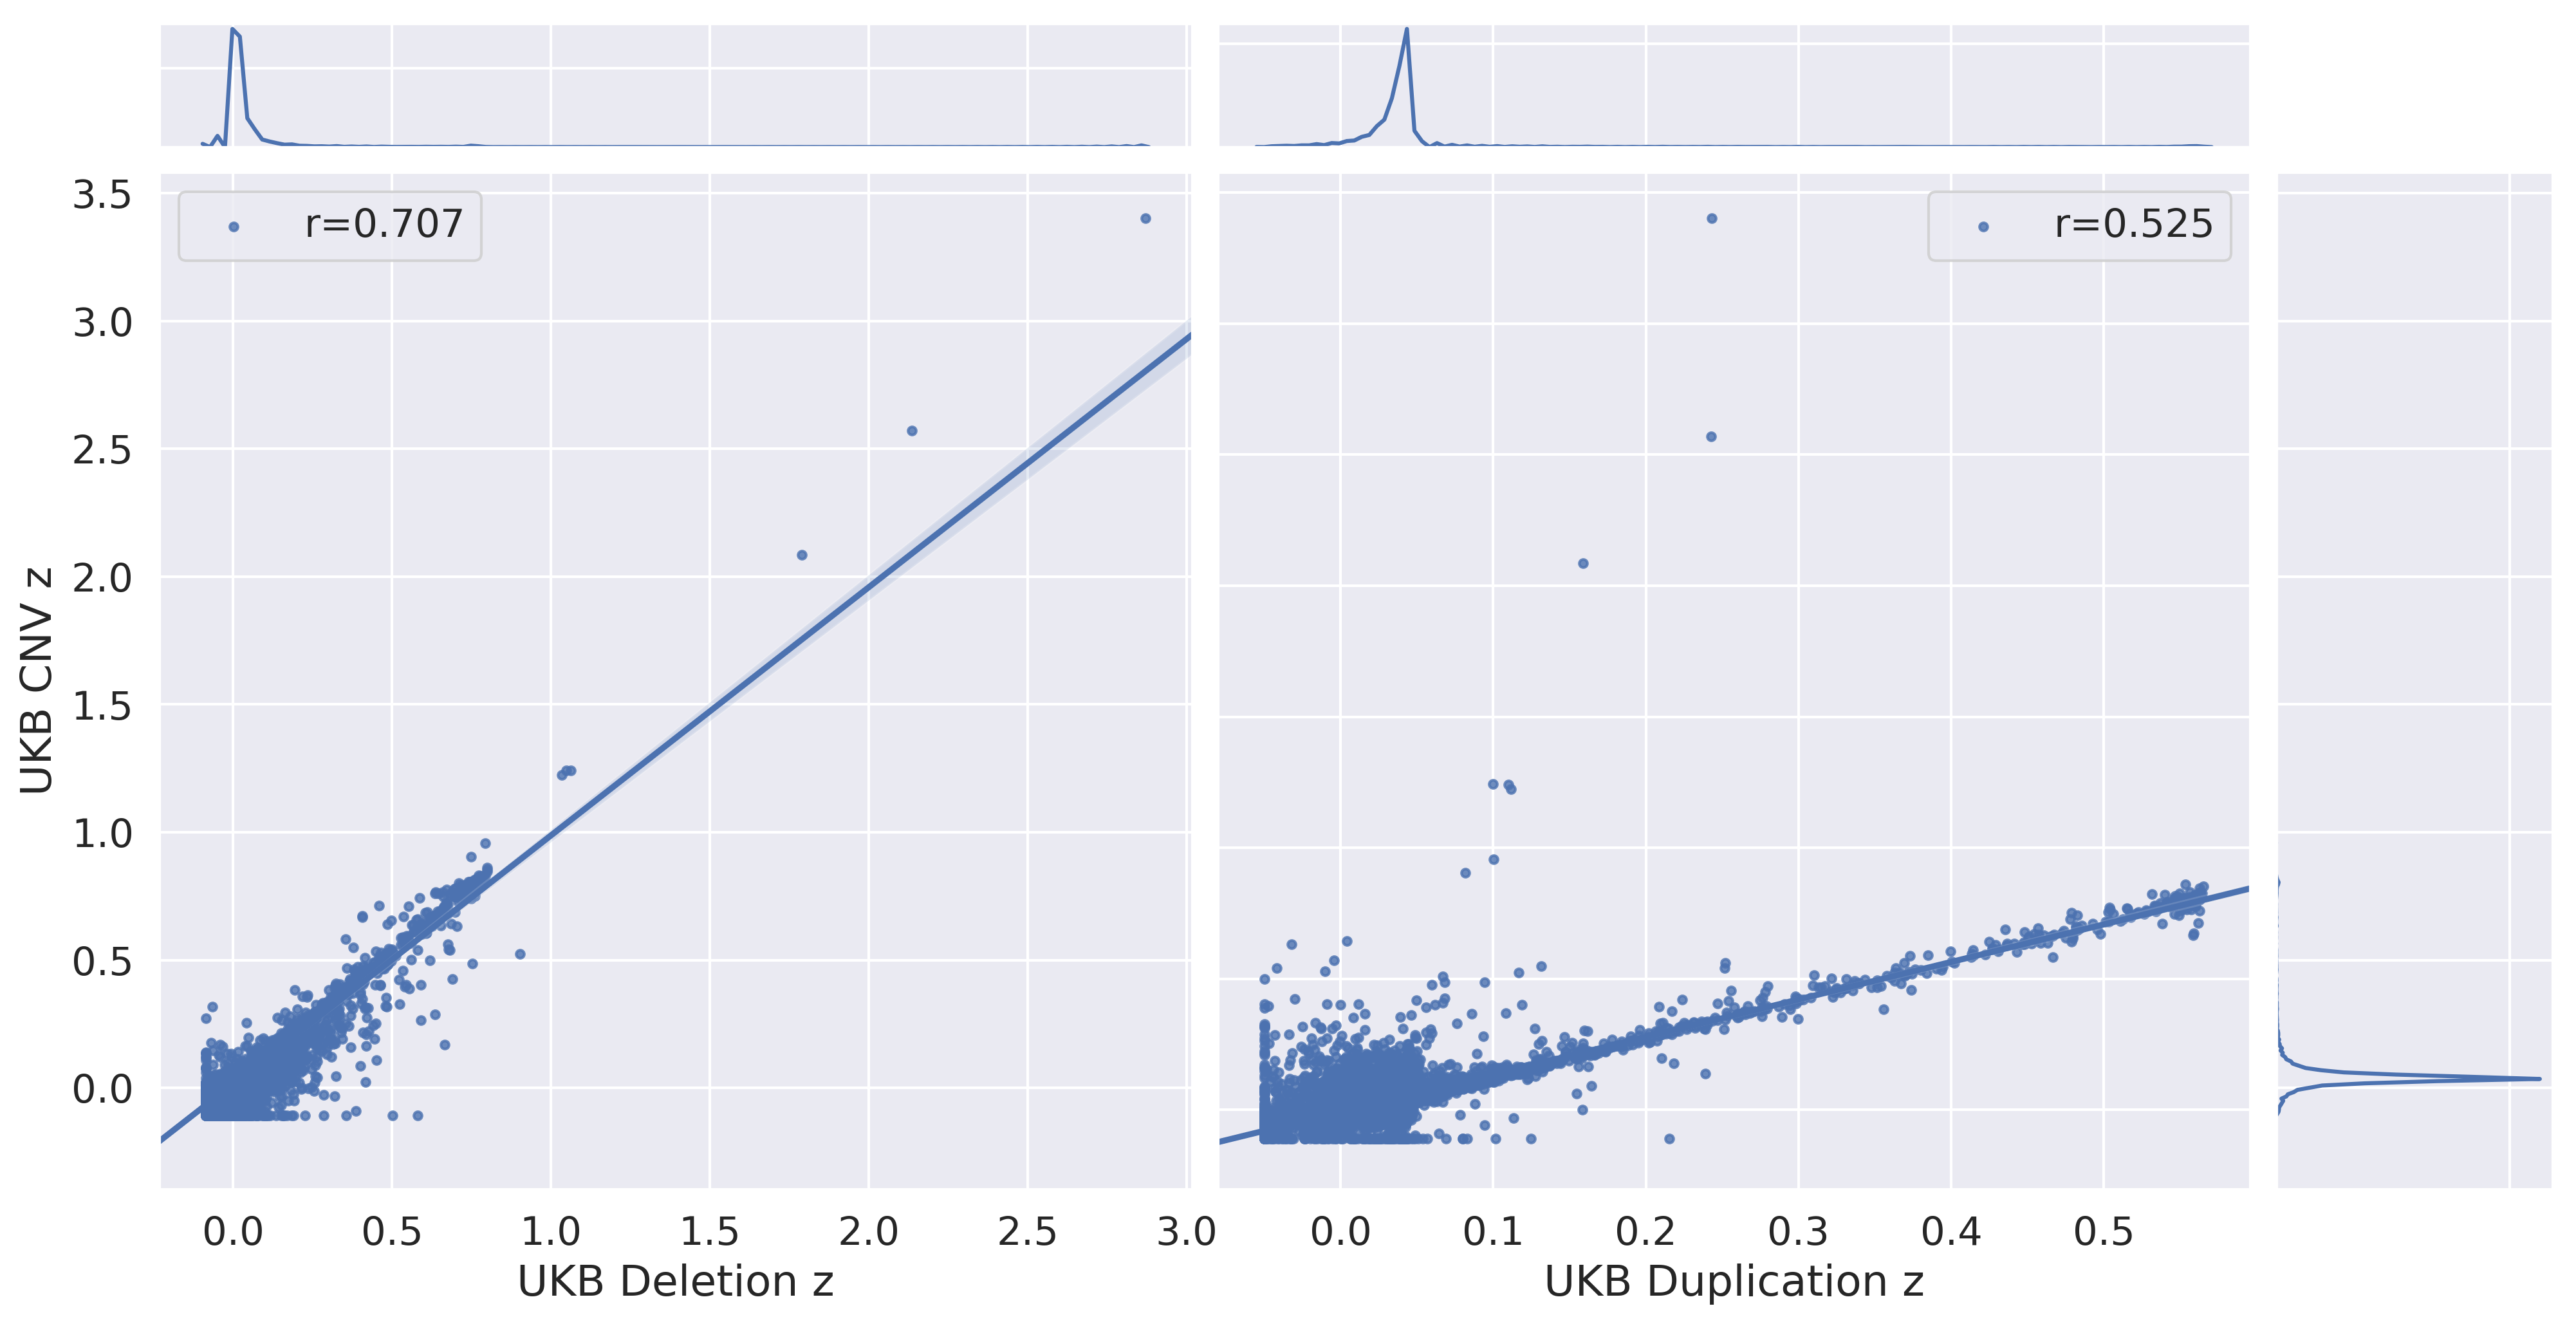

In [5]:
# Figure S3
plt.clf()
fig = plt.figure(figsize=(16,8), dpi=300)
grid = plt.GridSpec(8,16)

# regression for UKB + DEL
ax0 = fig.add_subplot(grid[1:,:7])
sns.regplot(x='ukb_del_z', y='ukb_z', data=simp, ax=ax0, marker='.', 
            label='r={0:.3f}'.format(spearmanr(simp[['ukb_del_z', 'ukb_z']])[0]))
ax0.set_xlabel('UKB Deletion z'), ax0.set_ylabel('UKB CNV z')
ax0.legend(loc="best")

# regression for UKB + DUP 
ax1 = fig.add_subplot(grid[1:,7:14])
sns.regplot(x='ukb_dup_z', y='ukb_z', data=simp, ax=ax1, marker='.', 
            label='r={0:.3f}'.format(spearmanr(simp[['ukb_dup_z', 'ukb_z']])[0]))
ax1.set_xlabel('UKB Duplication z'), ax1.set_ylabel('')
ax1.set_yticklabels(['' for _ in ax1.get_yticklabels()])
ax1.legend(loc="best")

# kde for DEL z
ax = fig.add_subplot(grid[:1,:7])
sns.kdeplot(simp['ukb_del_z'].values, ax=ax)
ax.set_ylabel(''), ax.set_xlabel('')
ax.set_xticks(ax0.get_xticks())
ax.set_xlim(ax0.get_xlim())
ax.set_xticklabels(['' for _ in ax.get_xticklabels()])
ax.set_yticklabels(['' for _ in ax.get_yticklabels()])

# KDE for DUP z
ax = fig.add_subplot(grid[:1,7:14])
sns.kdeplot(simp['ukb_dup_z'].values, ax=ax)
ax.set_ylabel(''), ax.set_xlabel('')
ax.set_xticks(ax1.get_xticks())
ax.set_xlim(ax1.get_xlim())
ax.set_xticklabels(['' for _ in ax.get_xticklabels()])
ax.set_yticklabels(['' for _ in ax.get_yticklabels()])

# KDE for UKB
ax = fig.add_subplot(grid[1:,14:])
sns.kdeplot(filter(lambda x: x < 1, simp['ukb_z'].tolist()), ax=ax, vertical=True)
ax.set_ylabel(''), ax.set_xlabel('')
ax.set_yticks(ax0.get_yticks())
ax.set_ylim(ax0.get_ylim())
ax.set_yticklabels(['' for _ in ax.get_yticklabels()])
ax.set_xticklabels(['' for _ in ax.get_xticklabels()])

plt.savefig('supplement/Figure-S3.pdf')
plt.show()

/home/users/magu/.local/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/home/users/magu/.local/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


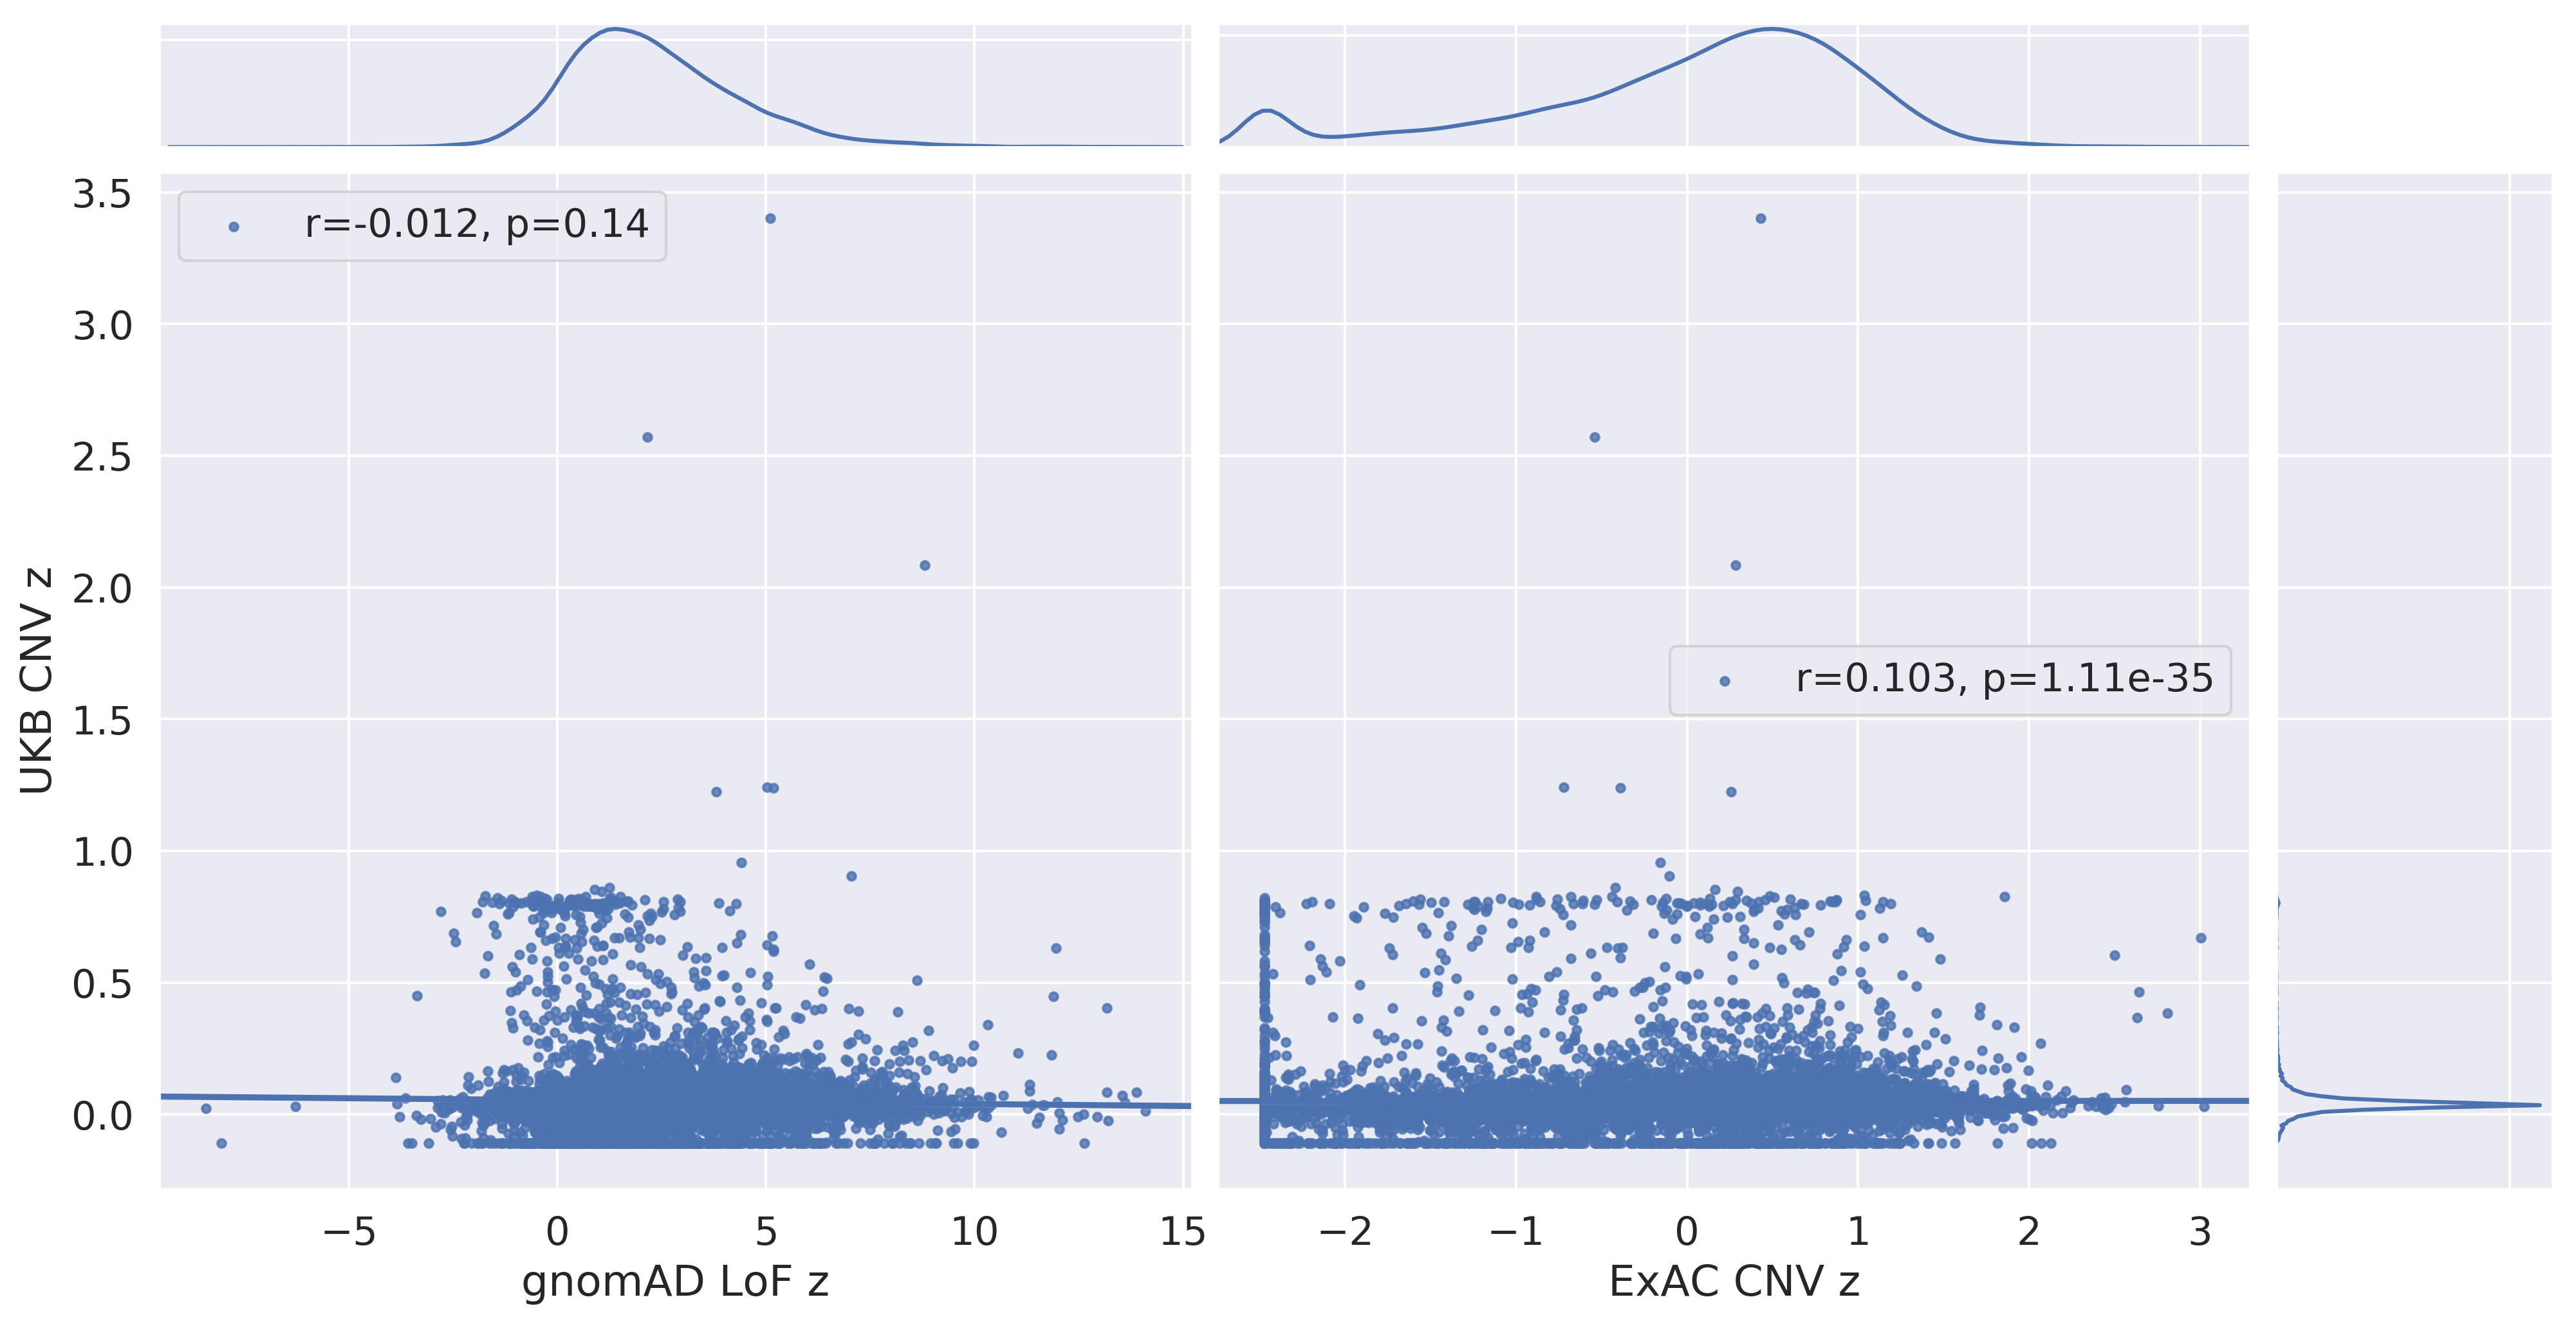

In [6]:
# Figure S4
plt.clf()
fig = plt.figure(figsize=(16,8), dpi=300)
grid = plt.GridSpec(8,16)

# regression for UKB + LOF
ax0 = fig.add_subplot(grid[1:,:7])
sns.regplot(x='lof_z', y='ukb_z', data=simp, ax=ax0, marker='.', 
            label='r={0:.3f}, p={1:.2f}'.format(*spearmanr(simp[['lof_z', 'ukb_z']])))
ax0.set_xlabel('gnomAD LoF z'), ax0.set_ylabel('UKB CNV z')
ax0.legend(loc="best")

# regression for UKB + ExAC CNV
ax1 = fig.add_subplot(grid[1:,7:14])
sns.regplot(x='cnv.score', y='ukb_z', data=simp, ax=ax1, marker='.', 
            label='r={0:.3f}, p={1:.2e}'.format(*spearmanr(simp[['cnv.score', 'ukb_z']])))
ax1.set_xlabel('ExAC CNV z'), ax1.set_ylabel('')
ax1.set_yticklabels(['' for _ in ax1.get_yticklabels()])
ax1.legend(loc="best")

# kde for LOF z
ax = fig.add_subplot(grid[:1,:7])
sns.kdeplot(simp['lof_z'].values, ax=ax)
ax.set_ylabel(''), ax.set_xlabel('')
ax.set_xticks(ax0.get_xticks())
ax.set_xlim(ax0.get_xlim())
ax.set_xticklabels(['' for _ in ax.get_xticklabels()])
ax.set_yticklabels(['' for _ in ax.get_yticklabels()])

# KDE for ExAC CNV
ax = fig.add_subplot(grid[:1,7:14])
sns.kdeplot(simp['cnv.score'].values, ax=ax)
ax.set_ylabel(''), ax.set_xlabel('')
ax.set_xticks(ax1.get_xticks())
ax.set_xlim(ax1.get_xlim())
ax.set_xticklabels(['' for _ in ax.get_xticklabels()])
ax.set_yticklabels(['' for _ in ax.get_yticklabels()])

# KDE for UKB
ax = fig.add_subplot(grid[1:,14:])
sns.kdeplot(filter(lambda x: x < 1, simp['ukb_z'].tolist()), ax=ax, vertical=True)
ax.set_ylabel(''), ax.set_xlabel('')
ax.set_yticks(ax0.get_yticks())
ax.set_ylim(ax0.get_ylim())
ax.set_yticklabels(['' for _ in ax.get_yticklabels()])
ax.set_xticklabels(['' for _ in ax.get_xticklabels()])

plt.savefig('supplement/Figure-S4.pdf')
plt.show()

/home/users/magu/.local/lib/python2.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


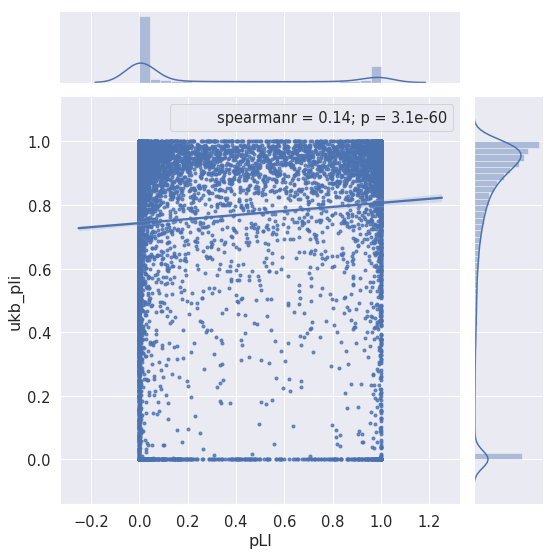

In [7]:
# not in supplement
sns.jointplot(x='pLI', y='ukb_pli', data=simp, kind='reg', marker='.', height=8, stat_func=spearmanr)
plt.show()

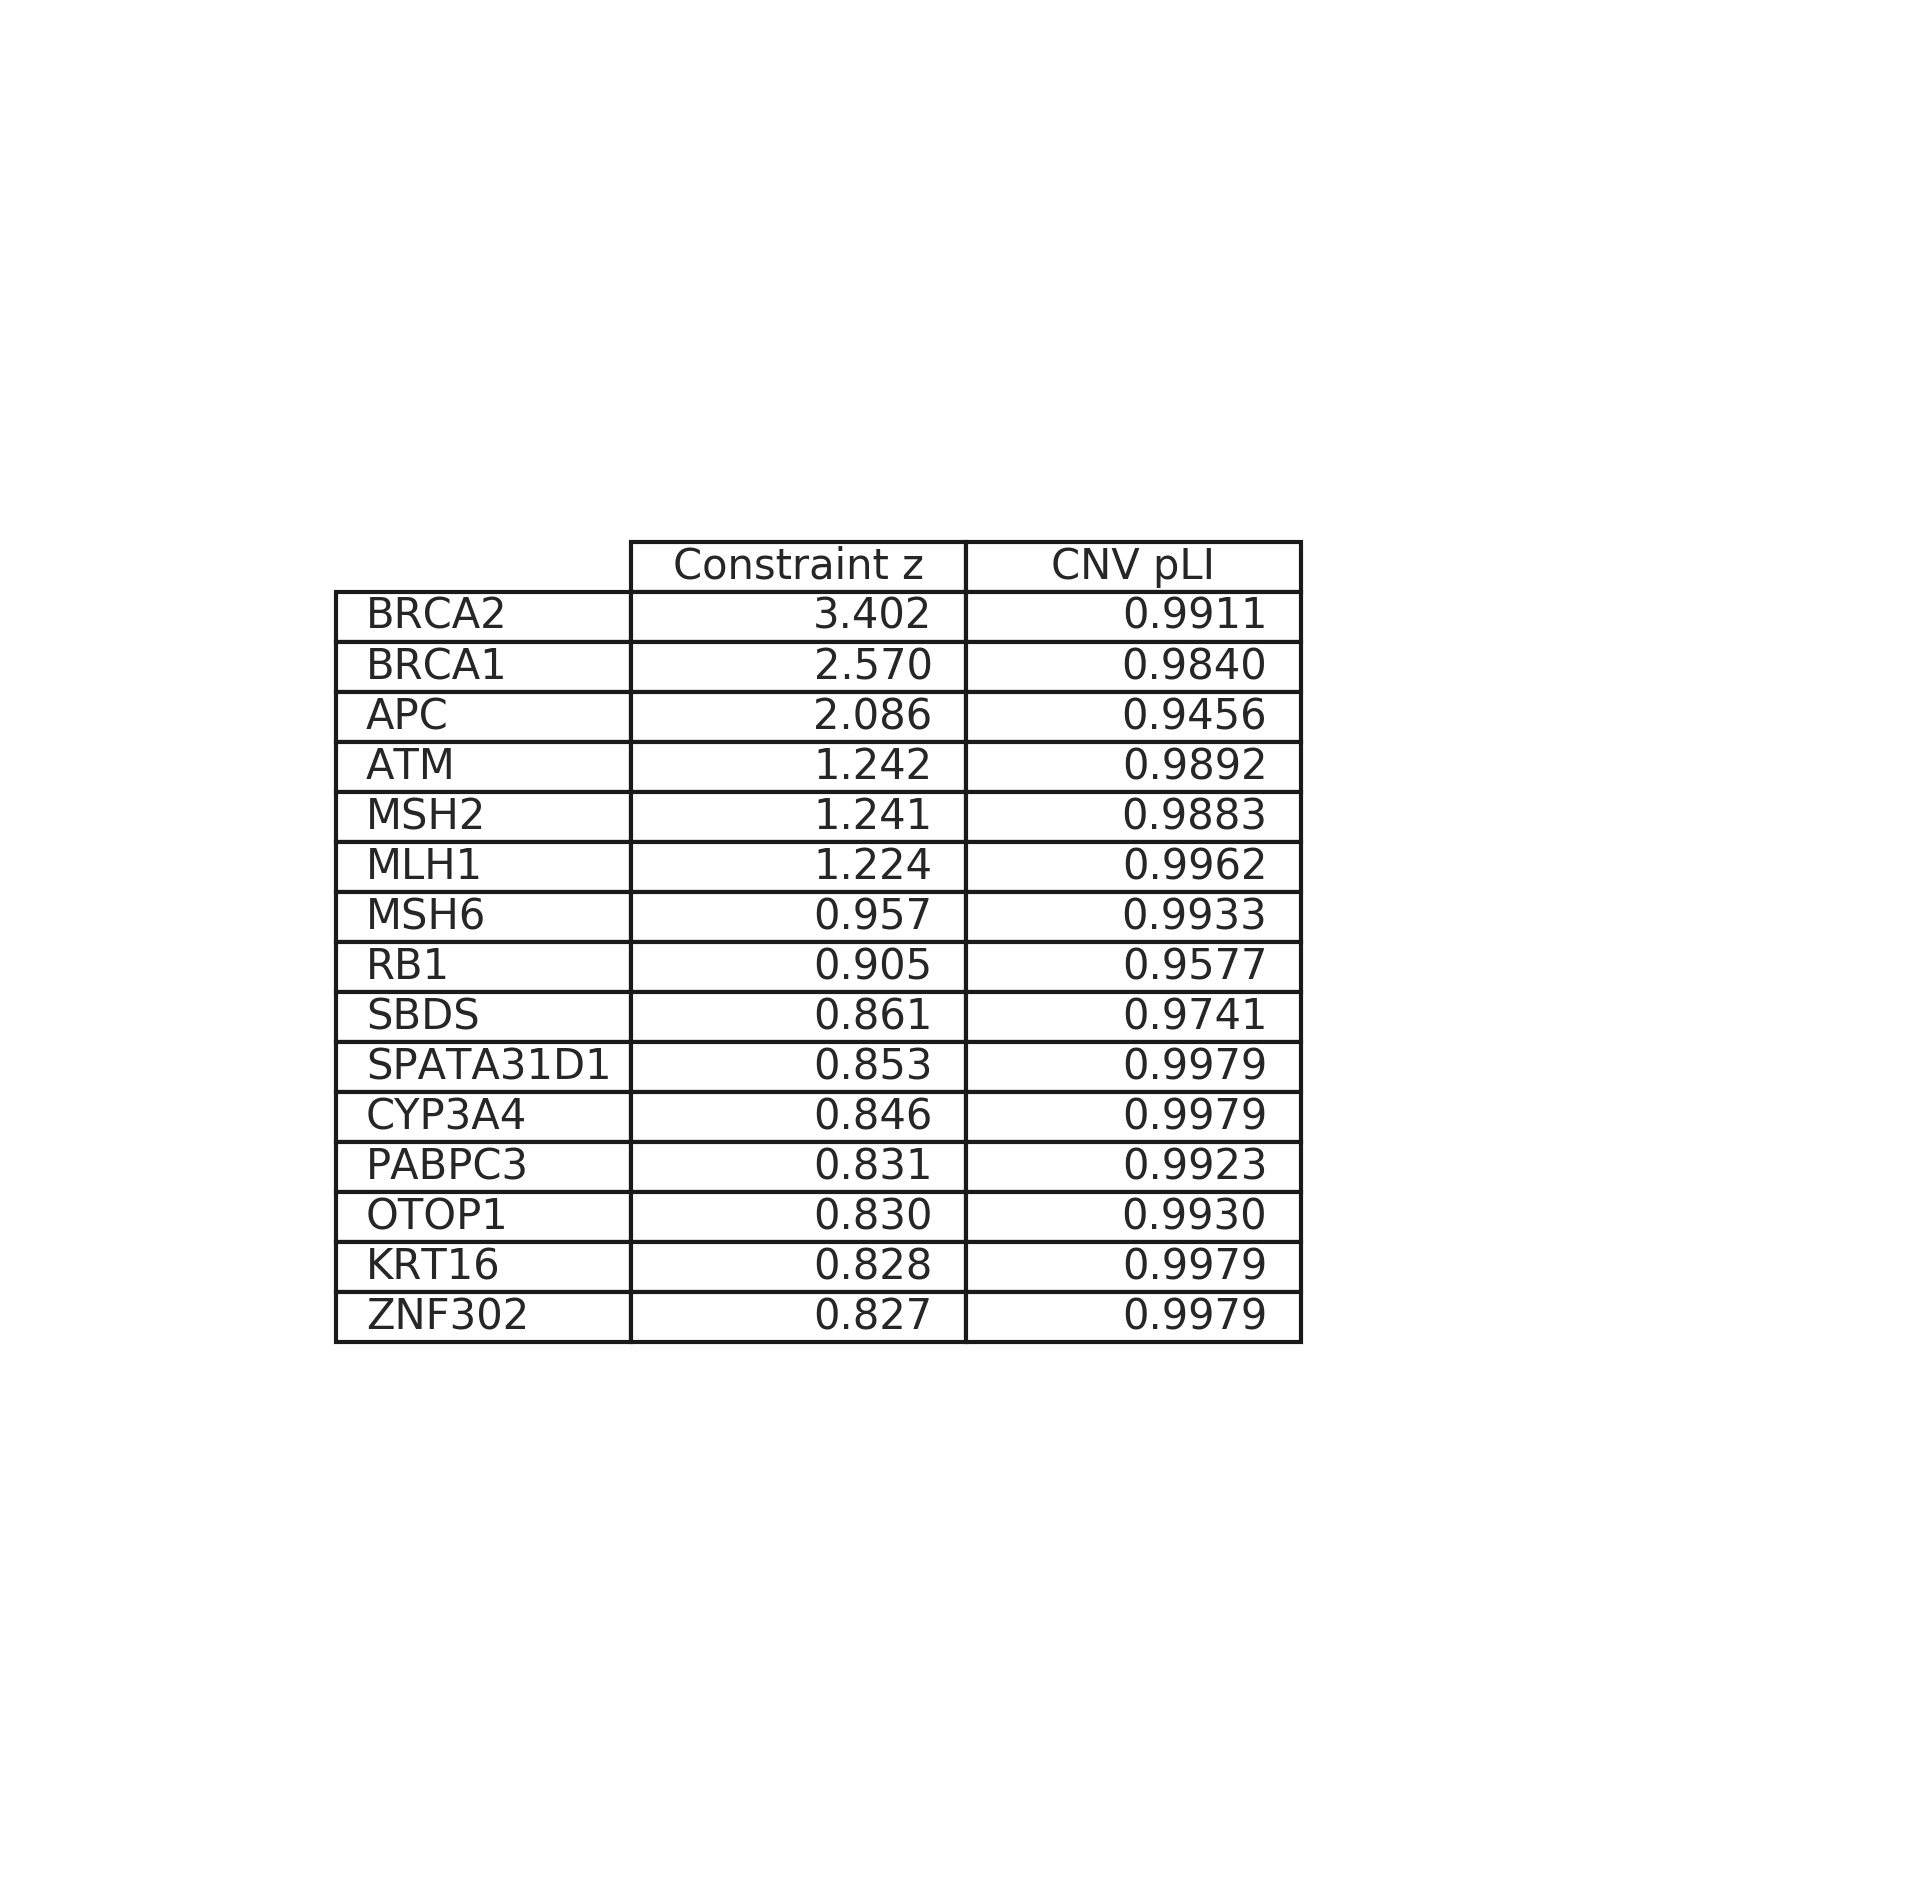

In [8]:
# Table 1: Most highly constrained genes to CNV
tab_data = {}
top = simp[['ukb_z', 'ukb_pli']].sort_values('ukb_z').tail(15)[::-1]
top.to_csv('tables/Table1_gene_constraint.tsv', sep='\t', header=['Constraint z','CNV pLI'])

plt.figure(figsize=(8,8), dpi=300)
tab = plt.table(cellText=map(lambda x:['{:.3f}'.format(x[0]), '{:.4f}'.format(x[1])], 
                             top.values.tolist()),
                rowLabels=top.index,
                colLabels=['Constraint z', 'CNV pLI'],
                colWidths = [0.18, 0.18],
                loc='center'
               )
tab.auto_set_font_size(False)
tab.set_fontsize(10)
plt.axis('tight')
plt.axis('off')
plt.xticks([],[])
plt.yticks([],[])
plt.show()

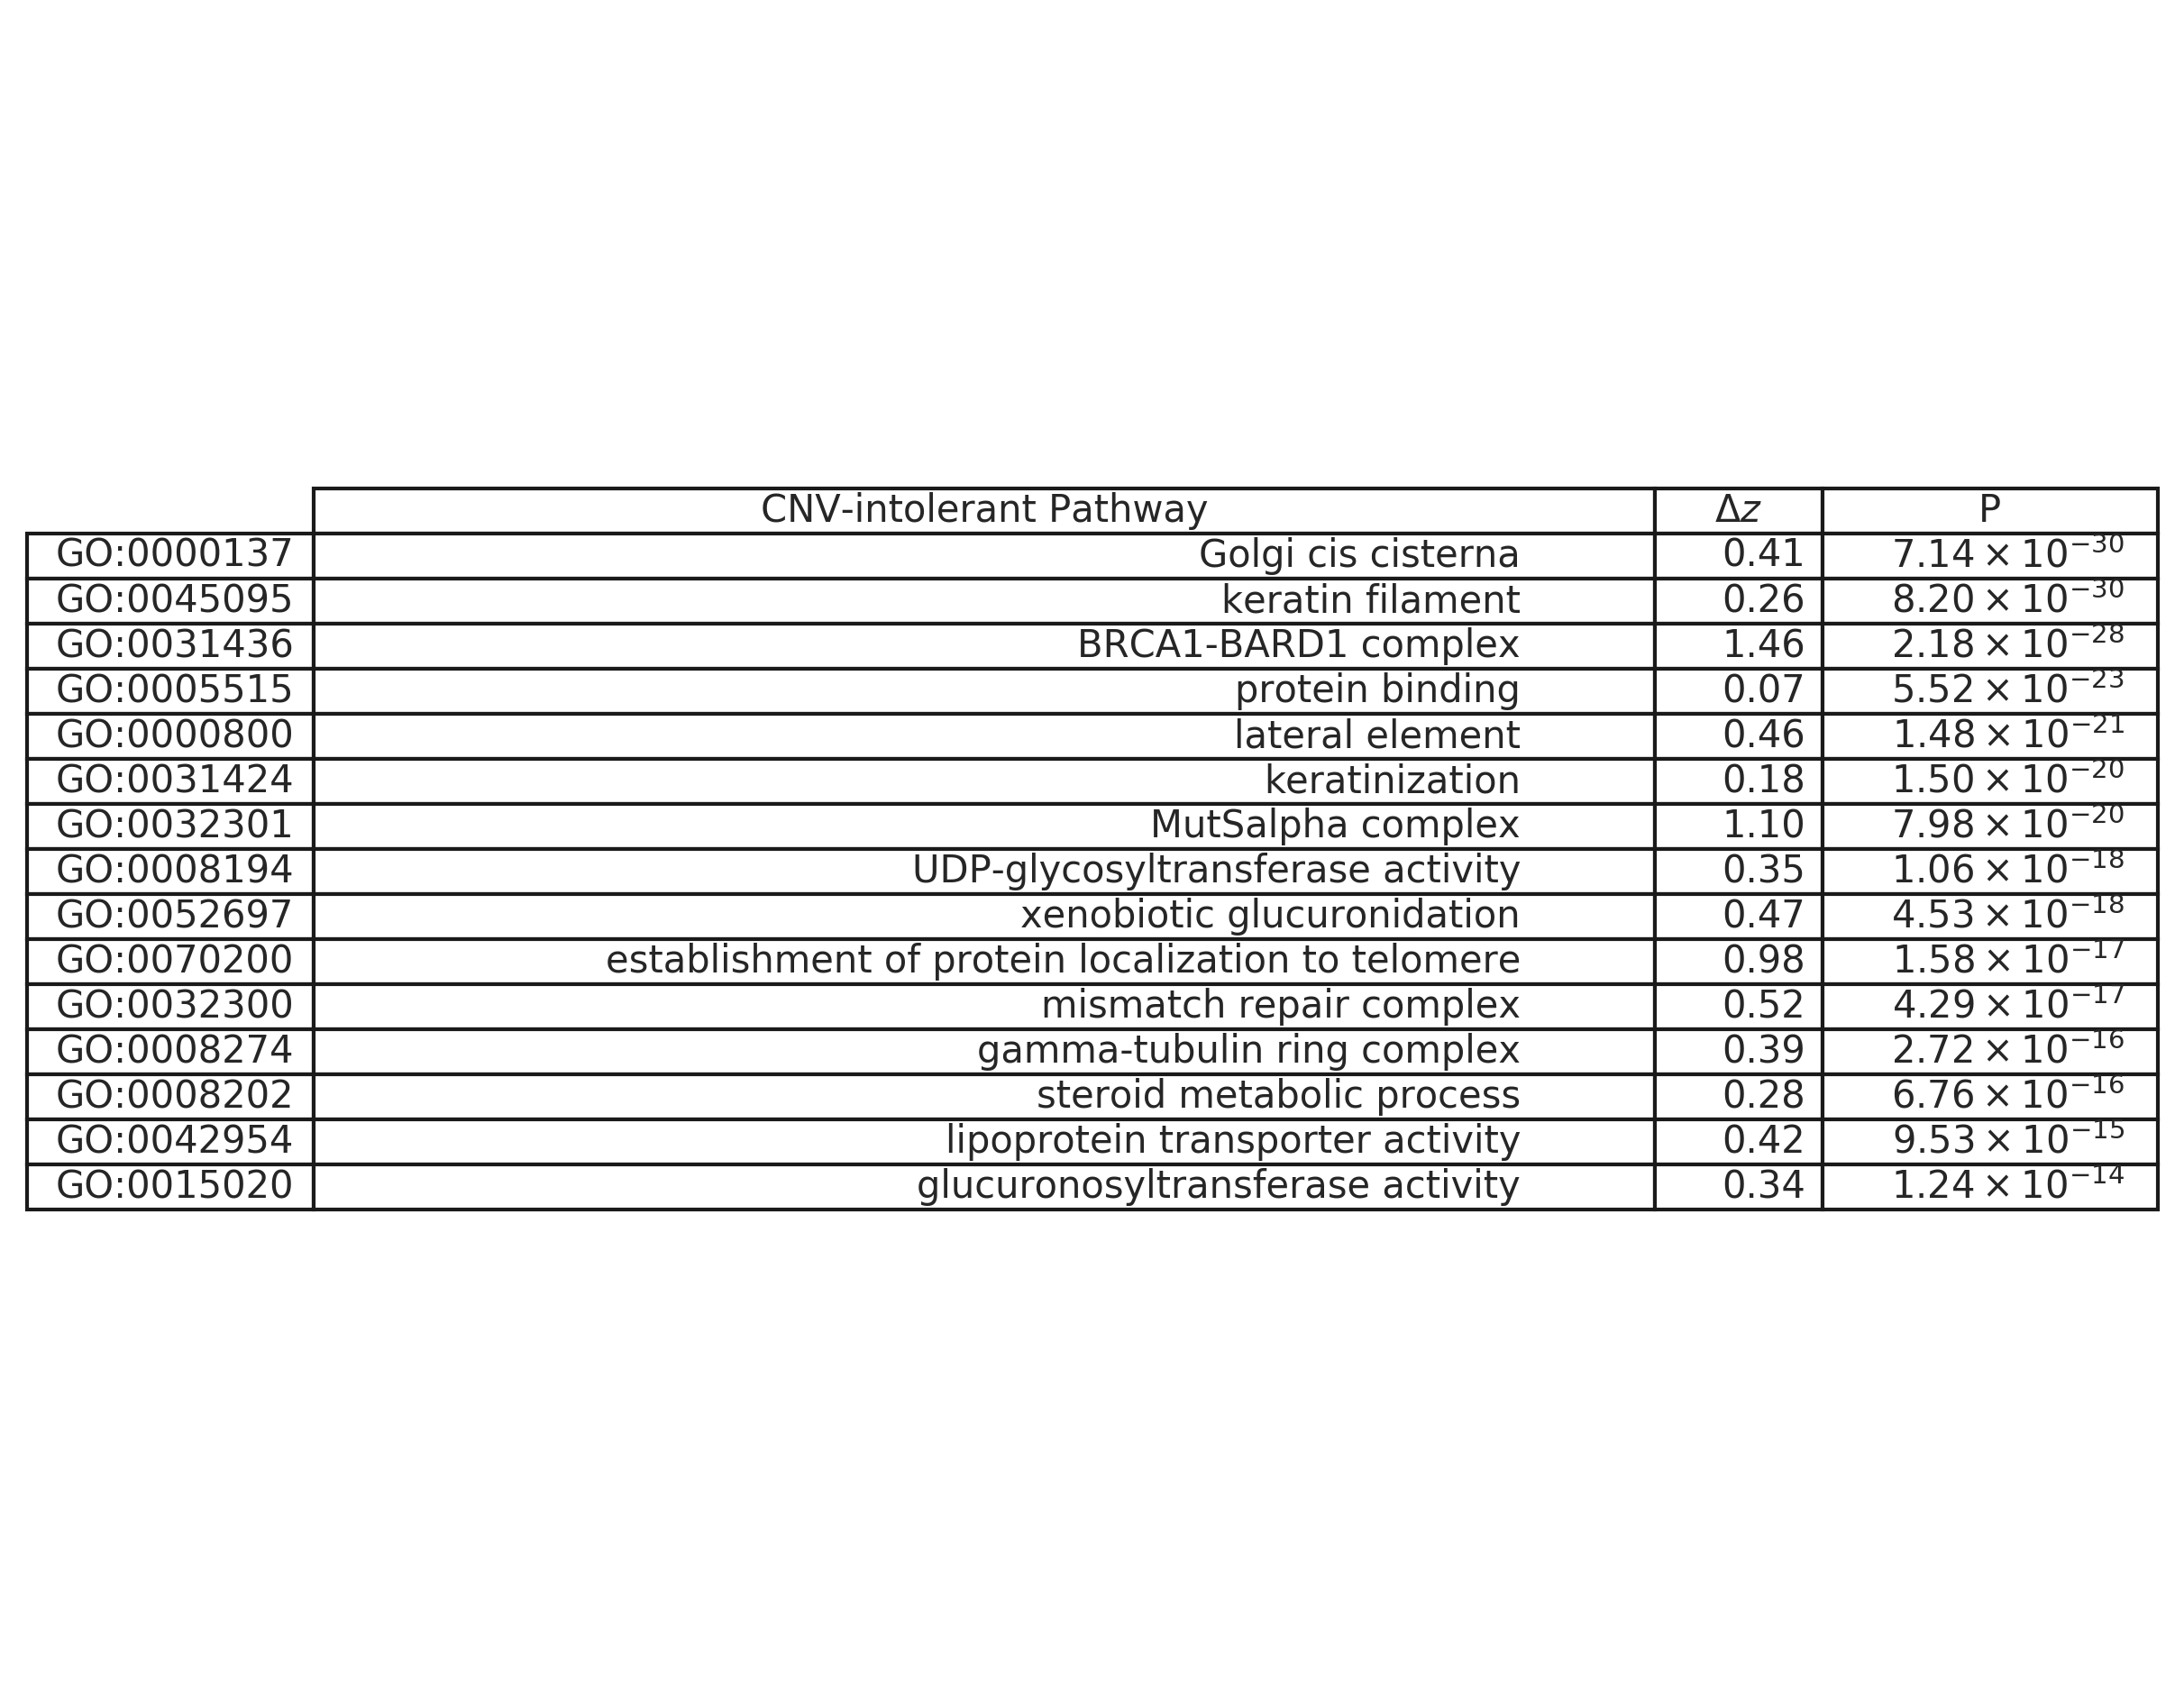

In [9]:
# Table 2: Most highly constrained GO Pathways to CNV
path = pd.read_table('../constraint/cnv_constraint_go-enrichment_20190430.tsv',
                     header=None, names=['ID', 'BETA', 'P', 'NAME', 'N'], index_col='ID')
top = path.query('N > 4 and BETA > 0').sort_values('P')[['NAME', 'BETA', 'P']].head(15)
top.to_csv('tables/Table2_go_constraint.tsv', sep="\t", header=['Pathway Name', 'Delta z', 'P'])
plt.figure(figsize=(8,8), dpi=300)
tab = plt.table(cellText=map(lambda x:[x[0], '{:.2f}'.format(x[1]), 
                                 '${0:.2f} \\times 10^{{{1}}}$'.format(x[2]*(10**int(1-np.log10(x[2]))), 
                                                                      int(np.log10(x[2]))-1)], 
                             top.values.tolist()),
                rowLabels=top.index,
                colLabels=['CNV-intolerant Pathway', '$\Delta z$', 'P'],
                colWidths = [0.8, 0.1, 0.2],
                loc='center',
               )
tab.auto_set_font_size(False)
tab.set_fontsize(10)
# tab.scale(8,8)
plt.axis('tight')
plt.axis('off')
plt.xticks([],[])
plt.yticks([],[])
plt.show()

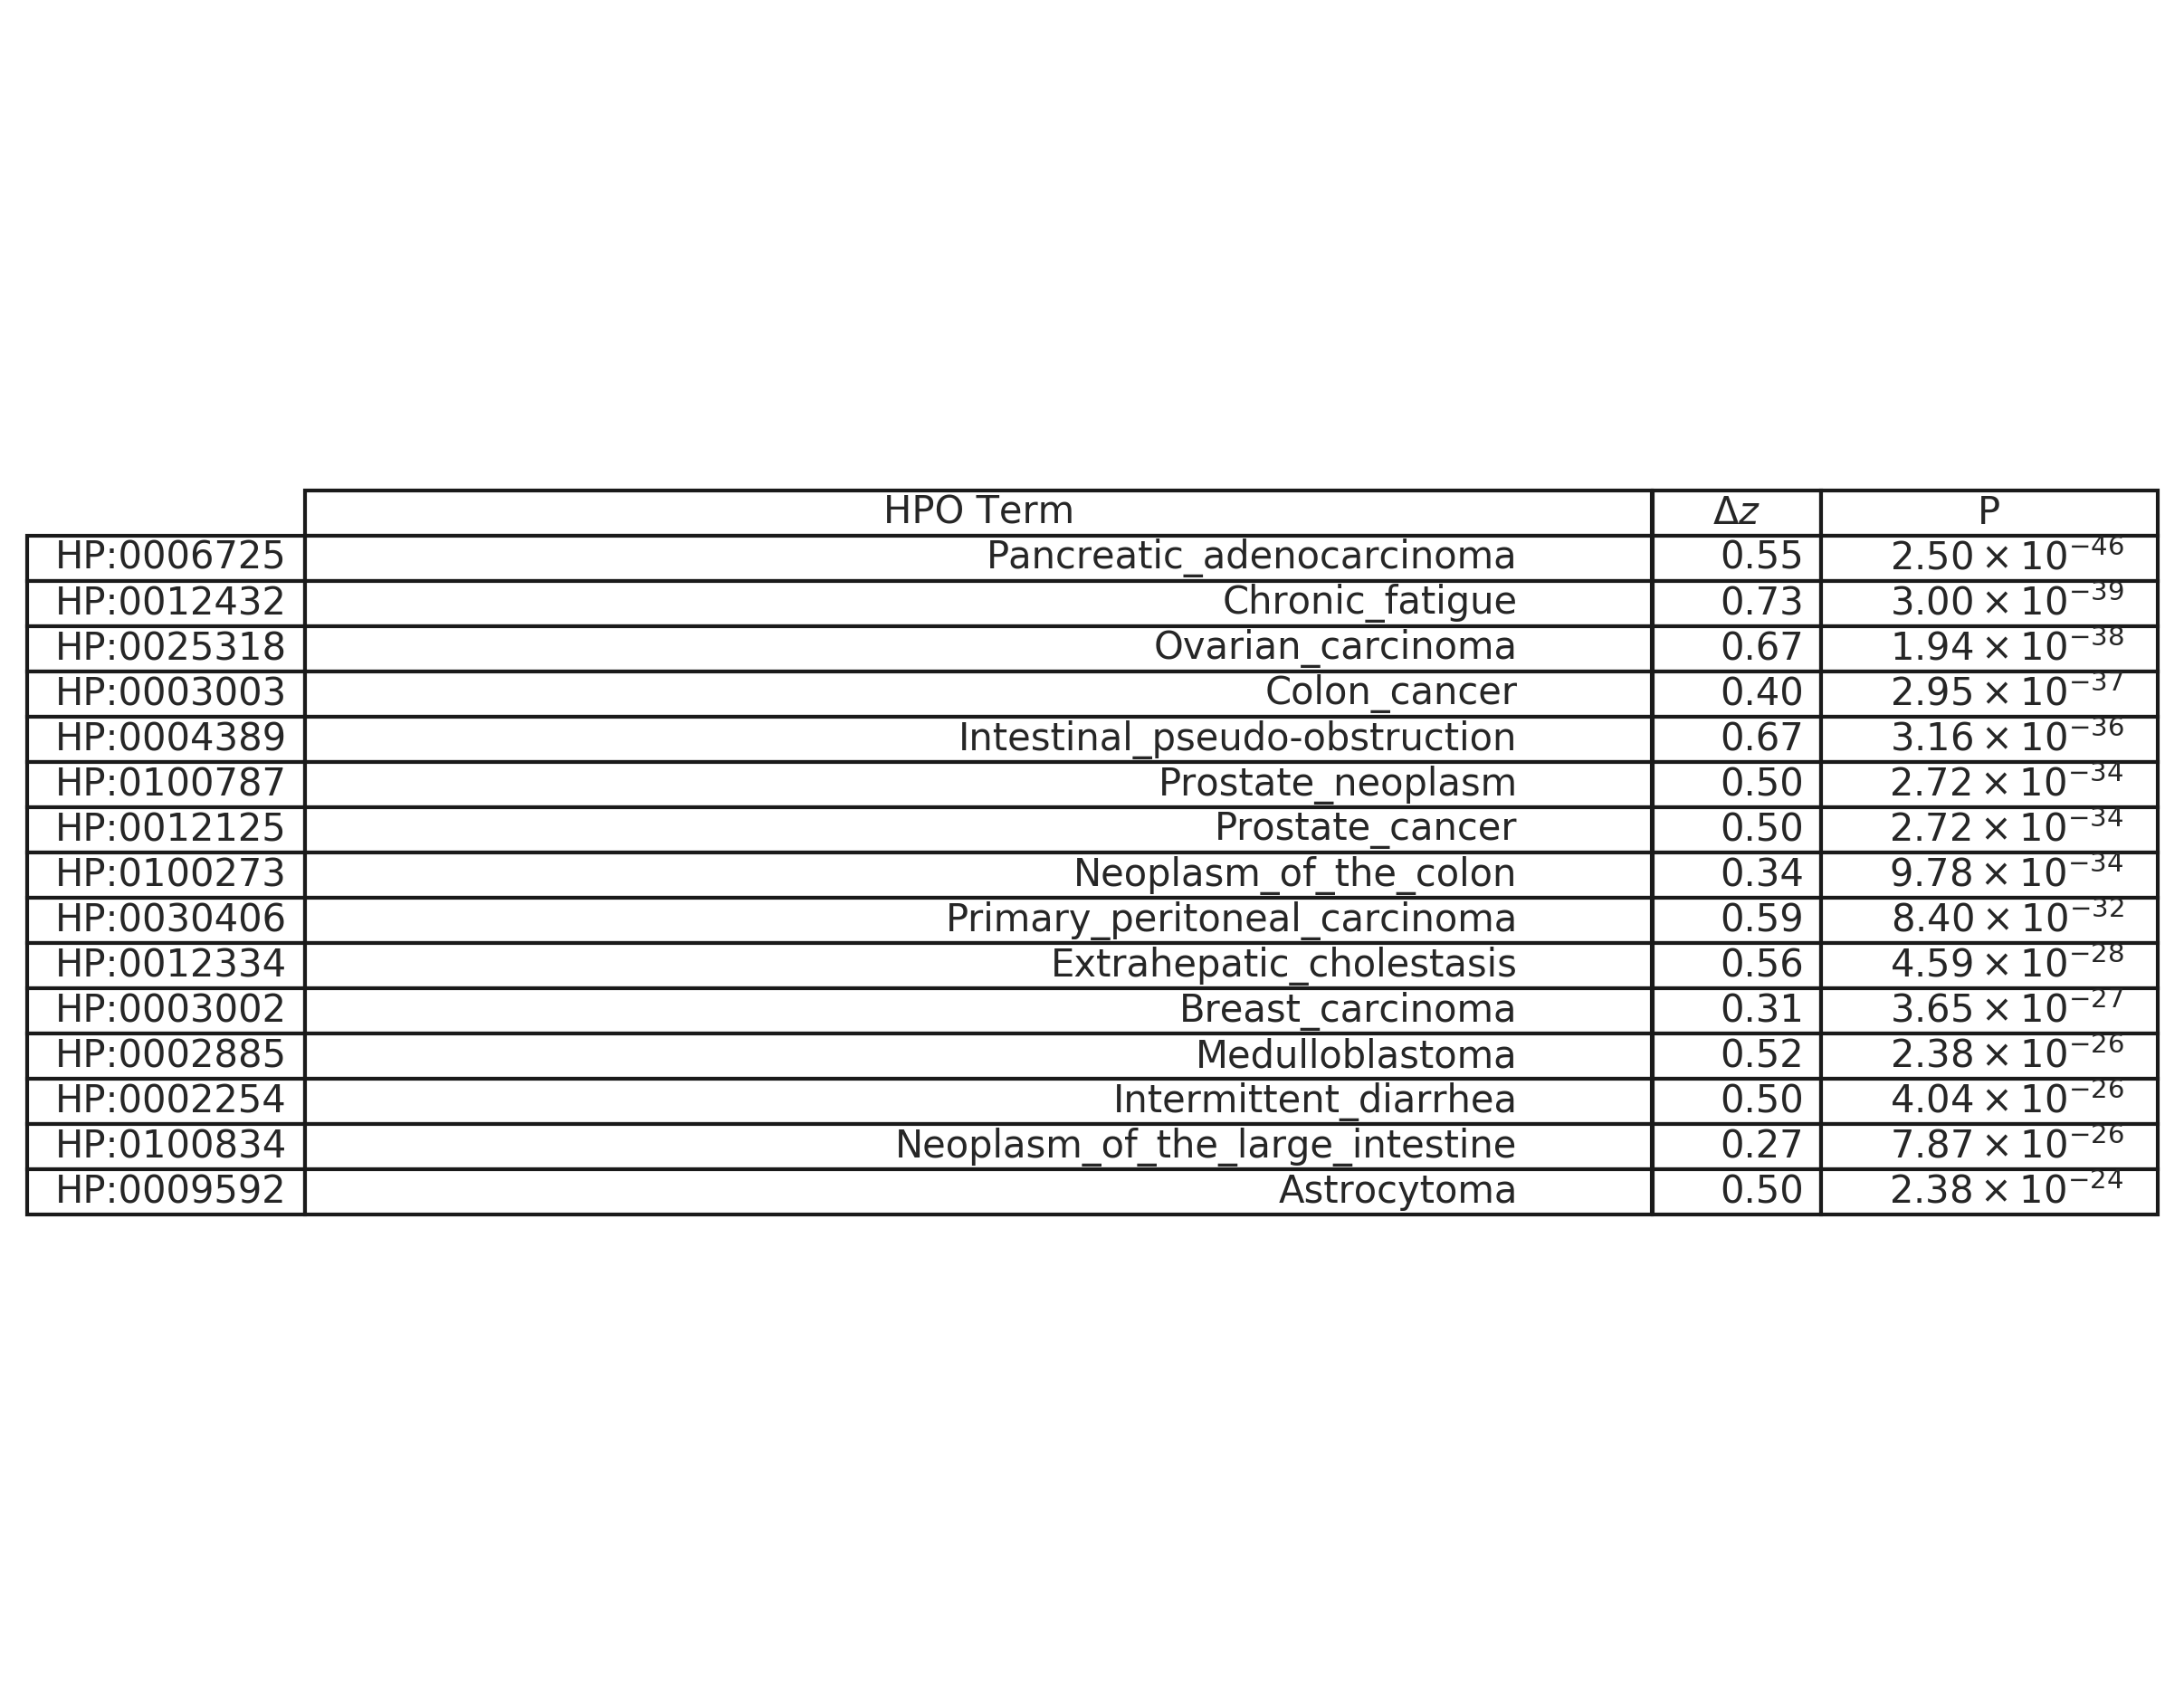

In [10]:
# Table 3: Most highly constrained HPO Pathways to CNV

# select terms with at least 10 genes and positive constraint
path = pd.read_table('../constraint/cnv_constraint_hpo-enrichment_20190430.tsv',
                     header=None, names=['ID', 'BETA', 'P', 'NAME', 'N'], index_col='ID', skiprows=1)
path[['BETA','P','N']] = path[['BETA','P','N']].astype(float)
top = path.query('N > 9 and BETA > 0').sort_values('P')[['NAME', 'BETA', 'P']].head(15)

# save to file
top.to_csv('tables/Table3_hpo_constraint.tsv', sep="\t", header=['CNV-intolerant HPO Term', 'Delta z', 'P'])

# display
plt.figure(figsize=(8,8), dpi=300)
tab = plt.table(cellText=map(lambda x:[x[0], '{:.2f}'.format(x[1]), 
                                 '${0:.2f} \\times 10^{{{1}}}$'.format(x[2]*(10**int(1-np.log10(x[2]))), 
                                                                      int(np.log10(x[2]))-1)], 
                             top.values.tolist()),
                rowLabels=top.index,
                colLabels=['HPO Term', '$\Delta z$', 'P'],
                colWidths = [0.8, 0.1, 0.2],
                loc='center',
               )
tab.auto_set_font_size(False)
tab.set_fontsize(10)
# tab.scale(8,8)
plt.axis('tight')
plt.axis('off')
plt.xticks([],[])
plt.yticks([],[])
plt.show()

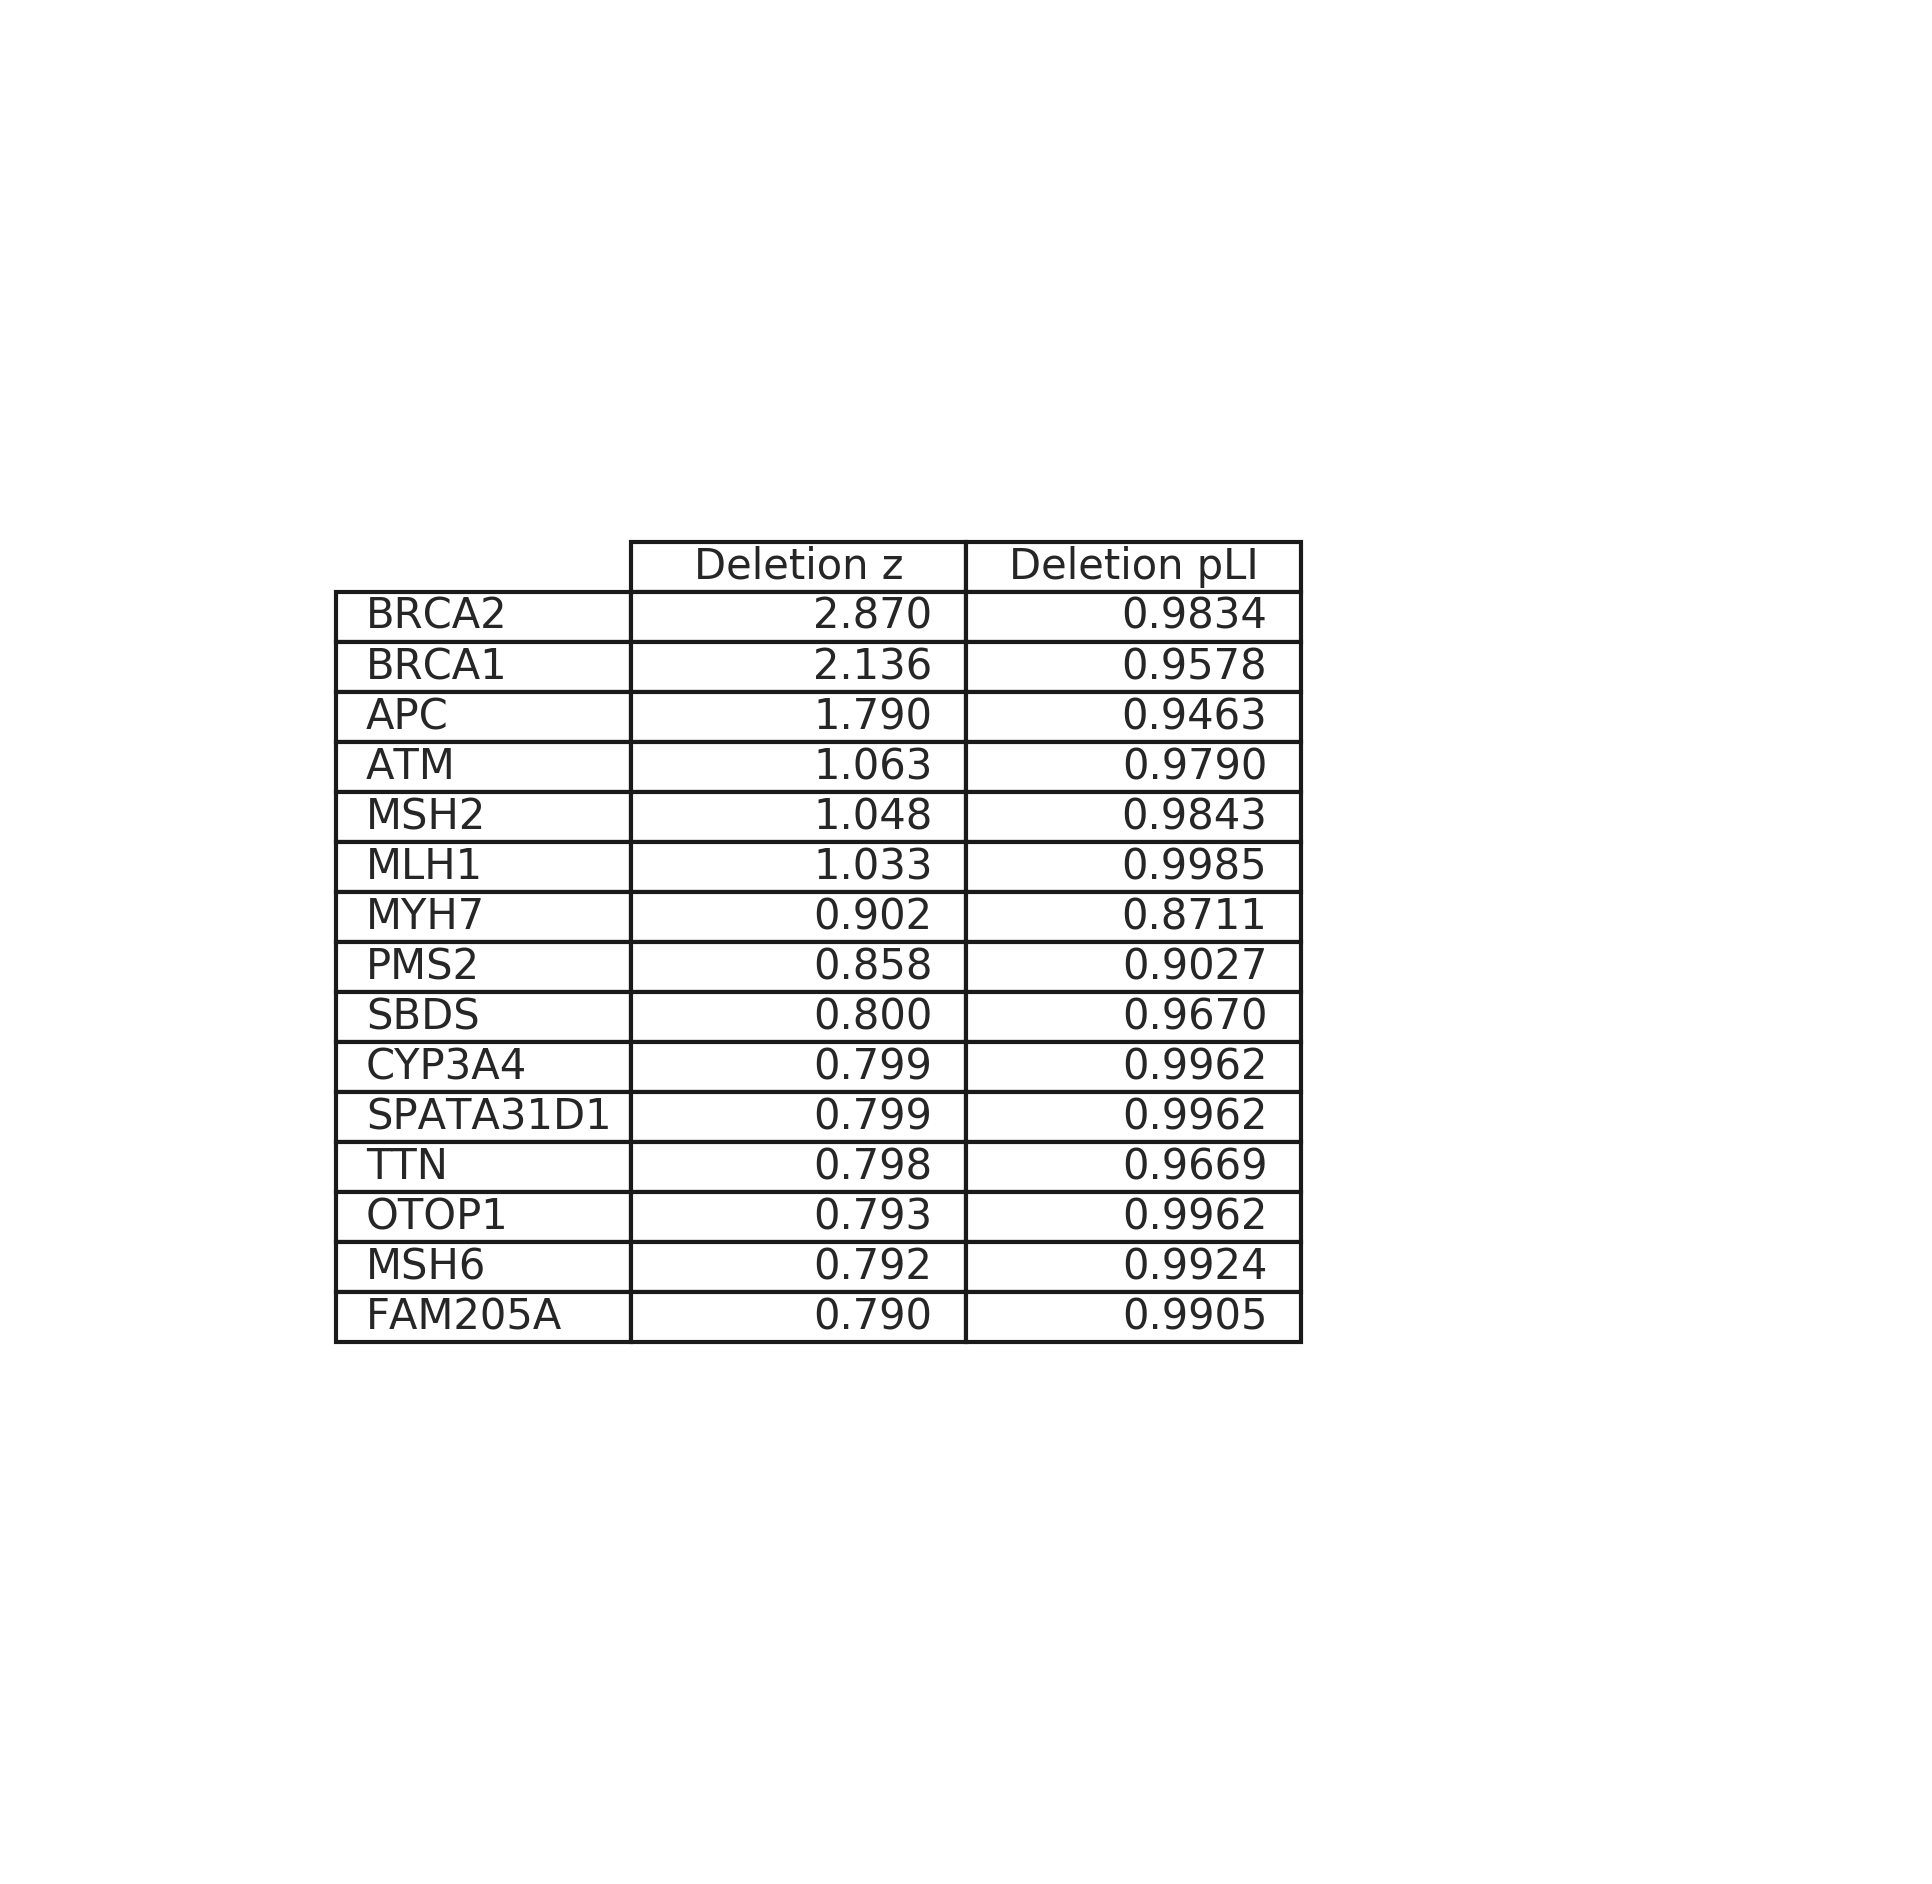

In [11]:
# Table S1a: Genes most intolerant to Deletion
top = ukb_del[['ukb_del_z', 'ukb_del_pli']].sort_values('ukb_del_z').tail(15)[::-1]
top.to_csv('supplement/Table-S1a_del_constraint.tsv', sep='\t', header=['Deletion z','Deletion pLI'])
plt.figure(figsize=(8,8), dpi=300)
tab = plt.table(cellText=map(lambda x:['{:.3f}'.format(x[0]), '{:.4f}'.format(x[1])], 
                             top.values.tolist()),
                rowLabels=top.index,
                colLabels=['Deletion z', 'Deletion pLI'],
                colWidths = [0.18, 0.18, 0.2],
                loc='center'
               )
tab.auto_set_font_size(False)
tab.set_fontsize(10)
plt.axis('tight')
plt.axis('off')
plt.xticks([],[])
plt.yticks([],[])
plt.show()

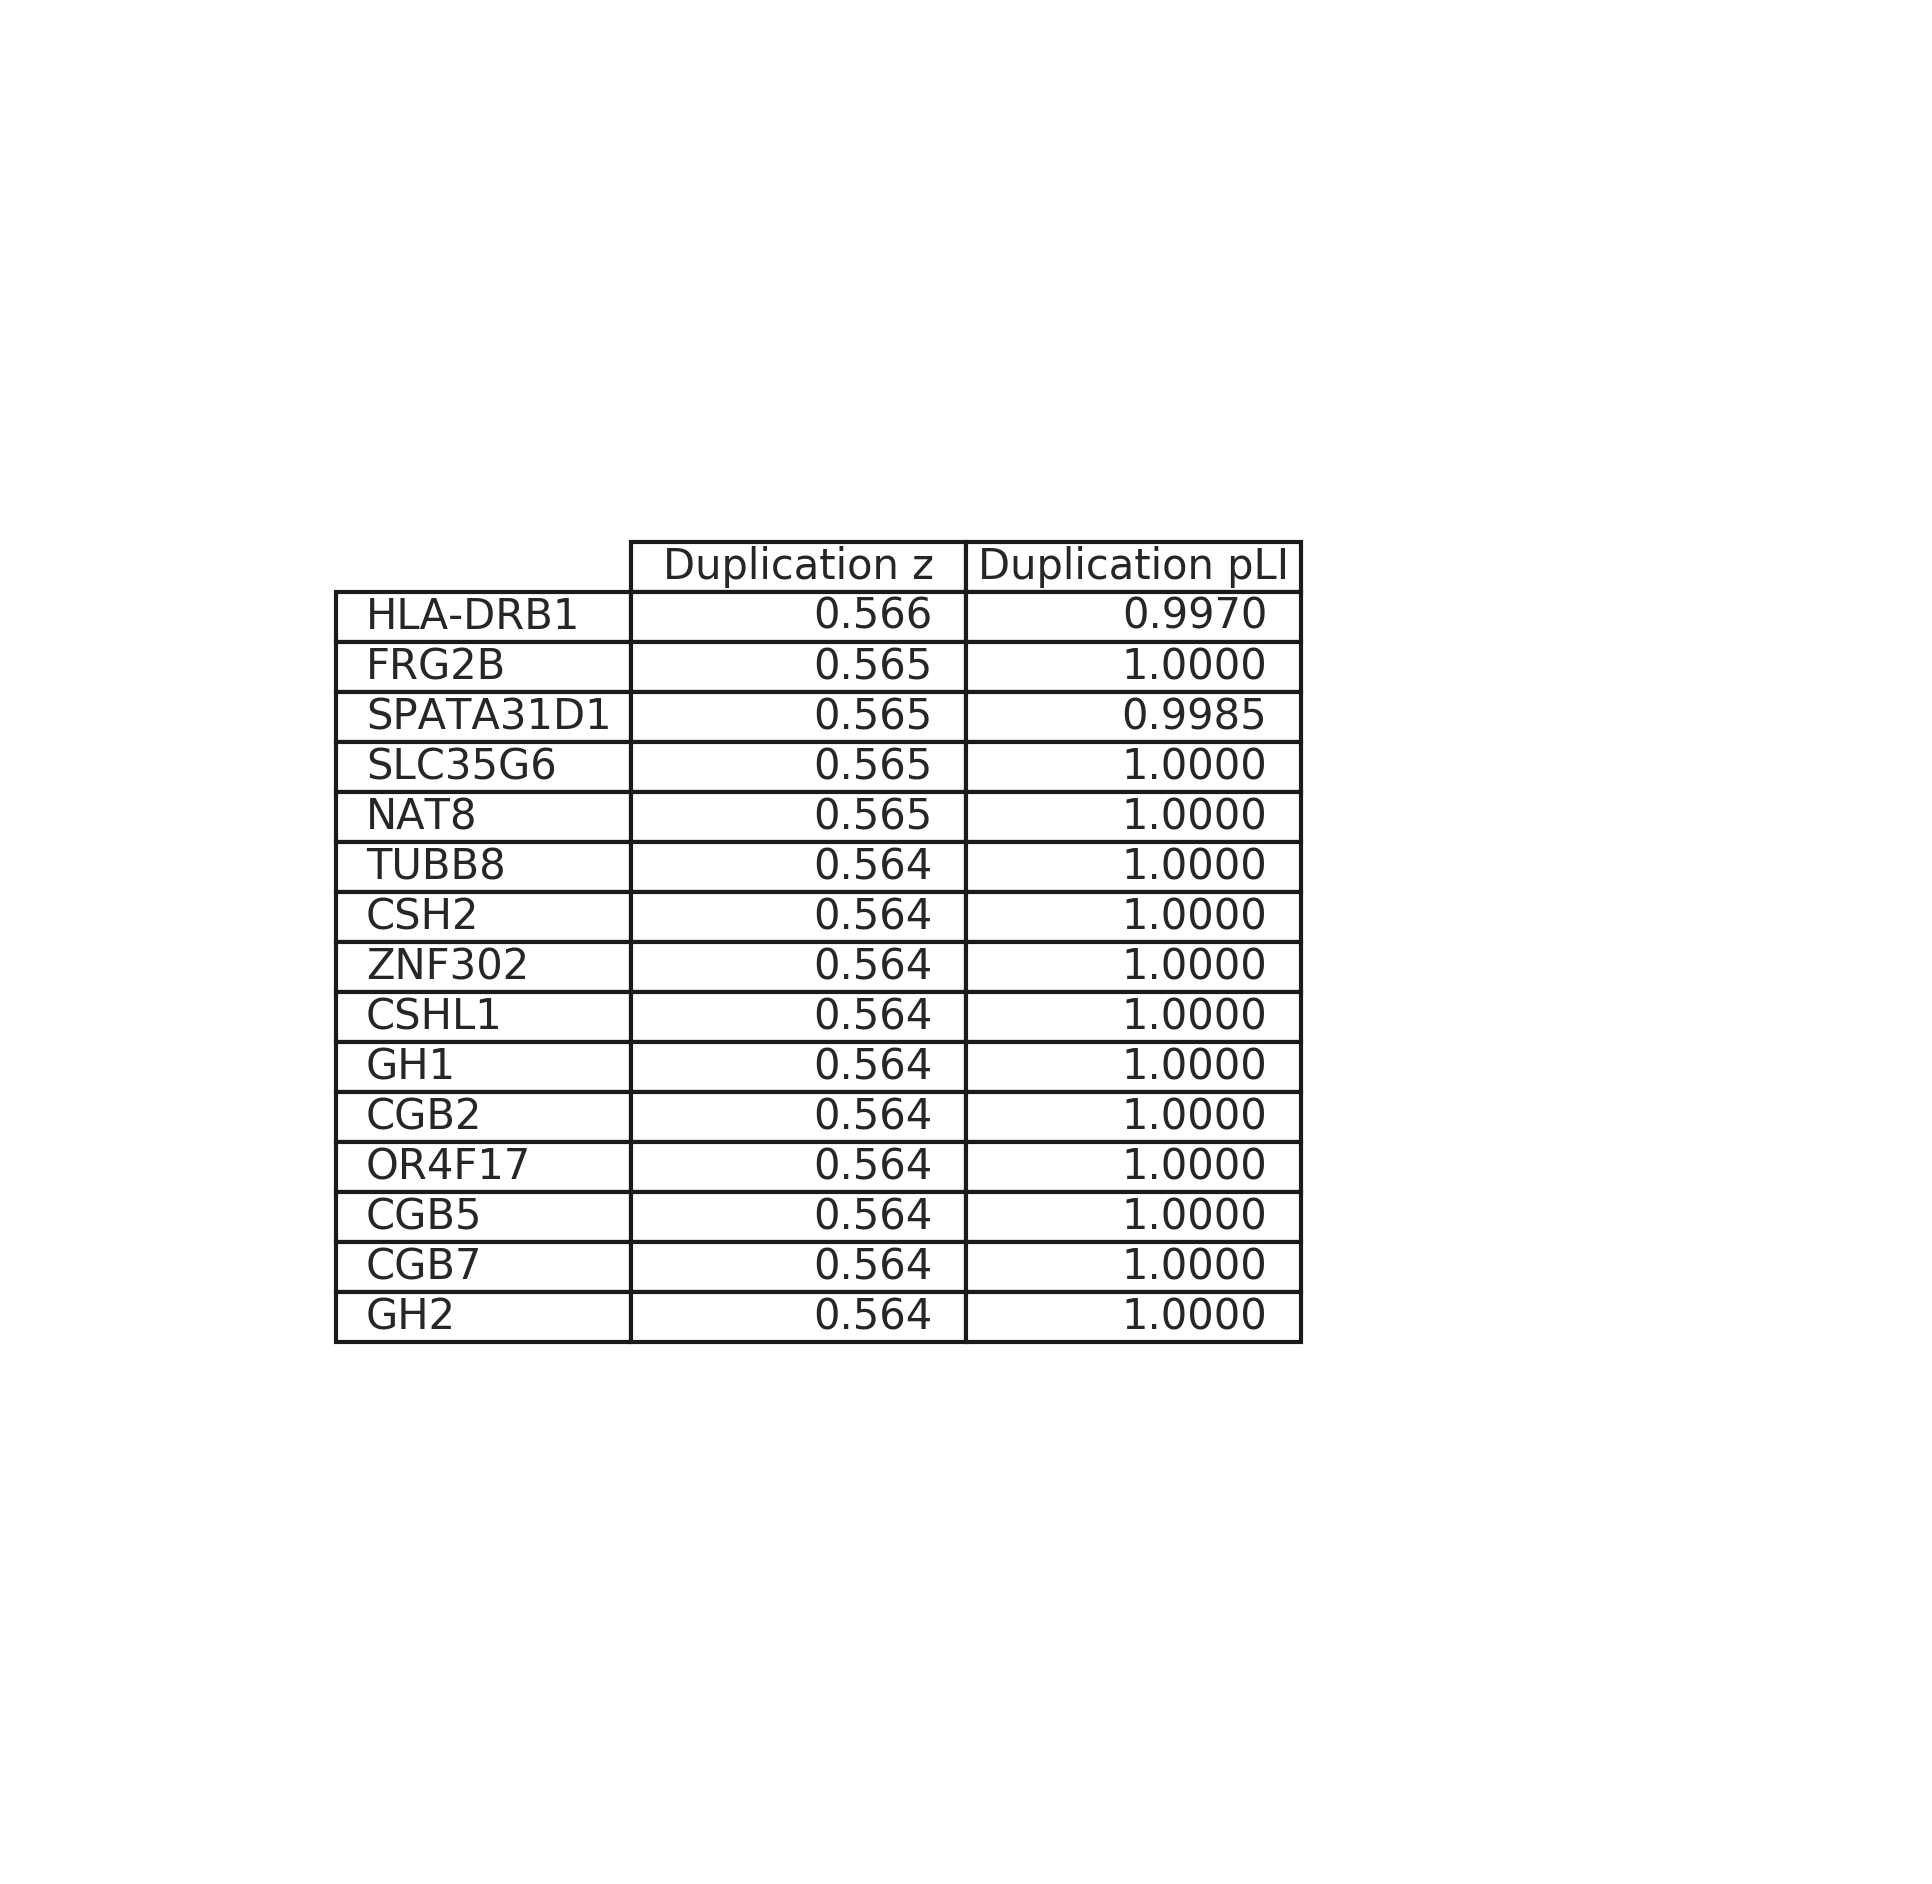

In [12]:
# Table S1b: Genes most intolerant to Duplication
top = ukb_dup[['ukb_dup_z','ukb_dup_pli']].sort_values('ukb_dup_z').tail(15)[::-1]
top.to_csv('supplement/Table-S1b_dup_constraint.tsv', sep='\t', header=['Duplication z','Duplication pLI'])
plt.figure(figsize=(8,8), dpi=300)
tab = plt.table(cellText=map(lambda x:['{:.3f}'.format(x[0]), '{:.4f}'.format(x[1])], 
                             top.values.tolist()),
                rowLabels=top.index,
                colLabels=['Duplication z', 'Duplication pLI'],
                colWidths = [0.18, 0.18, 0.2],
                loc='center'
               )
tab.auto_set_font_size(False)
tab.set_fontsize(10)
plt.axis('tight')
plt.axis('off')
plt.xticks([],[])
plt.yticks([],[])
plt.show()

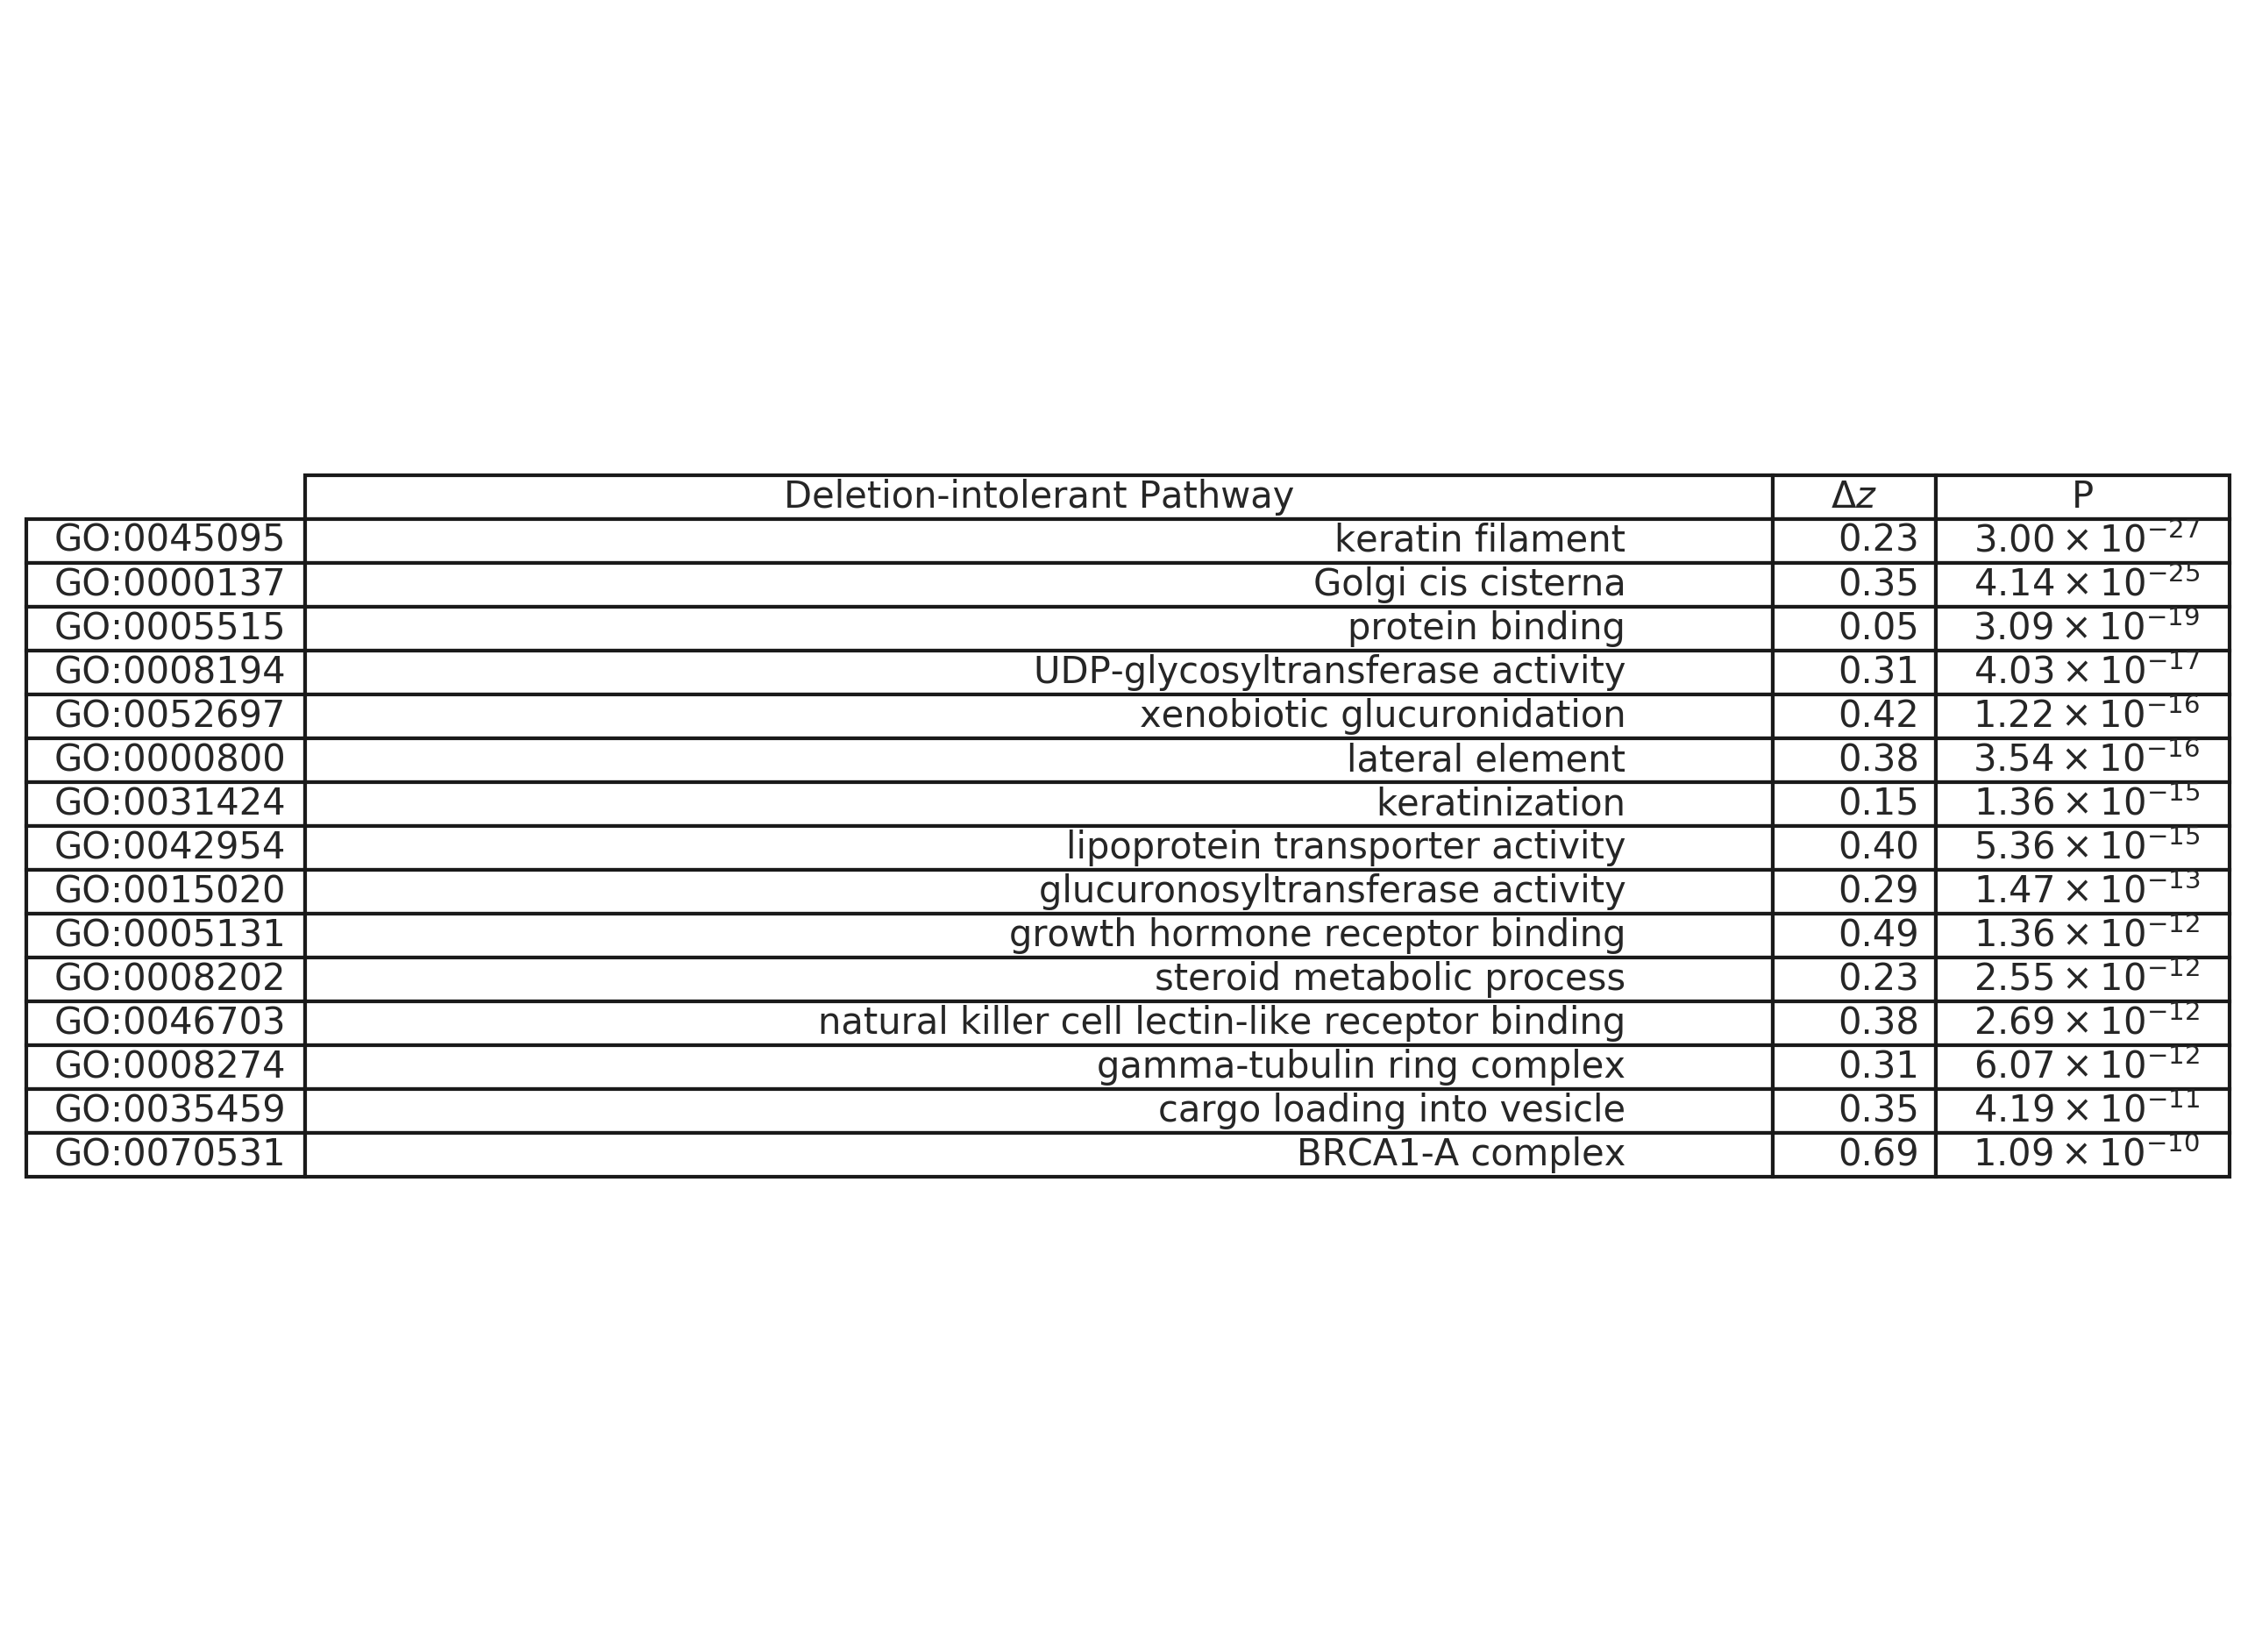

In [13]:
# Table S2a: GO Pathways most intolerant to Deletion

# select pathways with at least 10 genes and positive net constraint
path = pd.read_table('../constraint/cnv_del_go-enrichment_20190430.tsv',
                     header=None, names=['ID', 'BETA', 'P', 'NAME', 'N'], index_col='ID')
top = path.query('N > 9 and BETA > 0').sort_values('P')[['NAME', 'BETA', 'P']].head(15)

# write file
top.to_csv('supplement/Table-S2a_del_go.tsv', sep="\t", header=['Pathway Name', 'Delta z', 'P'])

# display
plt.figure(figsize=(8,8), dpi=300)
tab = plt.table(cellText=map(lambda x:[x[0], '{:.2f}'.format(x[1]), 
                                 '${0:.2f} \\times 10^{{{1}}}$'.format(x[2]*(10**int(1-np.log10(x[2]))), 
                                                                      int(np.log10(x[2]))-1)], 
                             top.values.tolist()),
                rowLabels=top.index,
                colLabels=['Deletion-intolerant Pathway', '$\Delta z$', 'P'],
                colWidths = [0.9, 0.1, 0.18],
                loc='center',
               )
tab.auto_set_font_size(False)
tab.set_fontsize(10)
# tab.scale(8,8)
plt.axis('tight')
plt.axis('off')
plt.xticks([],[])
plt.yticks([],[])
plt.show()

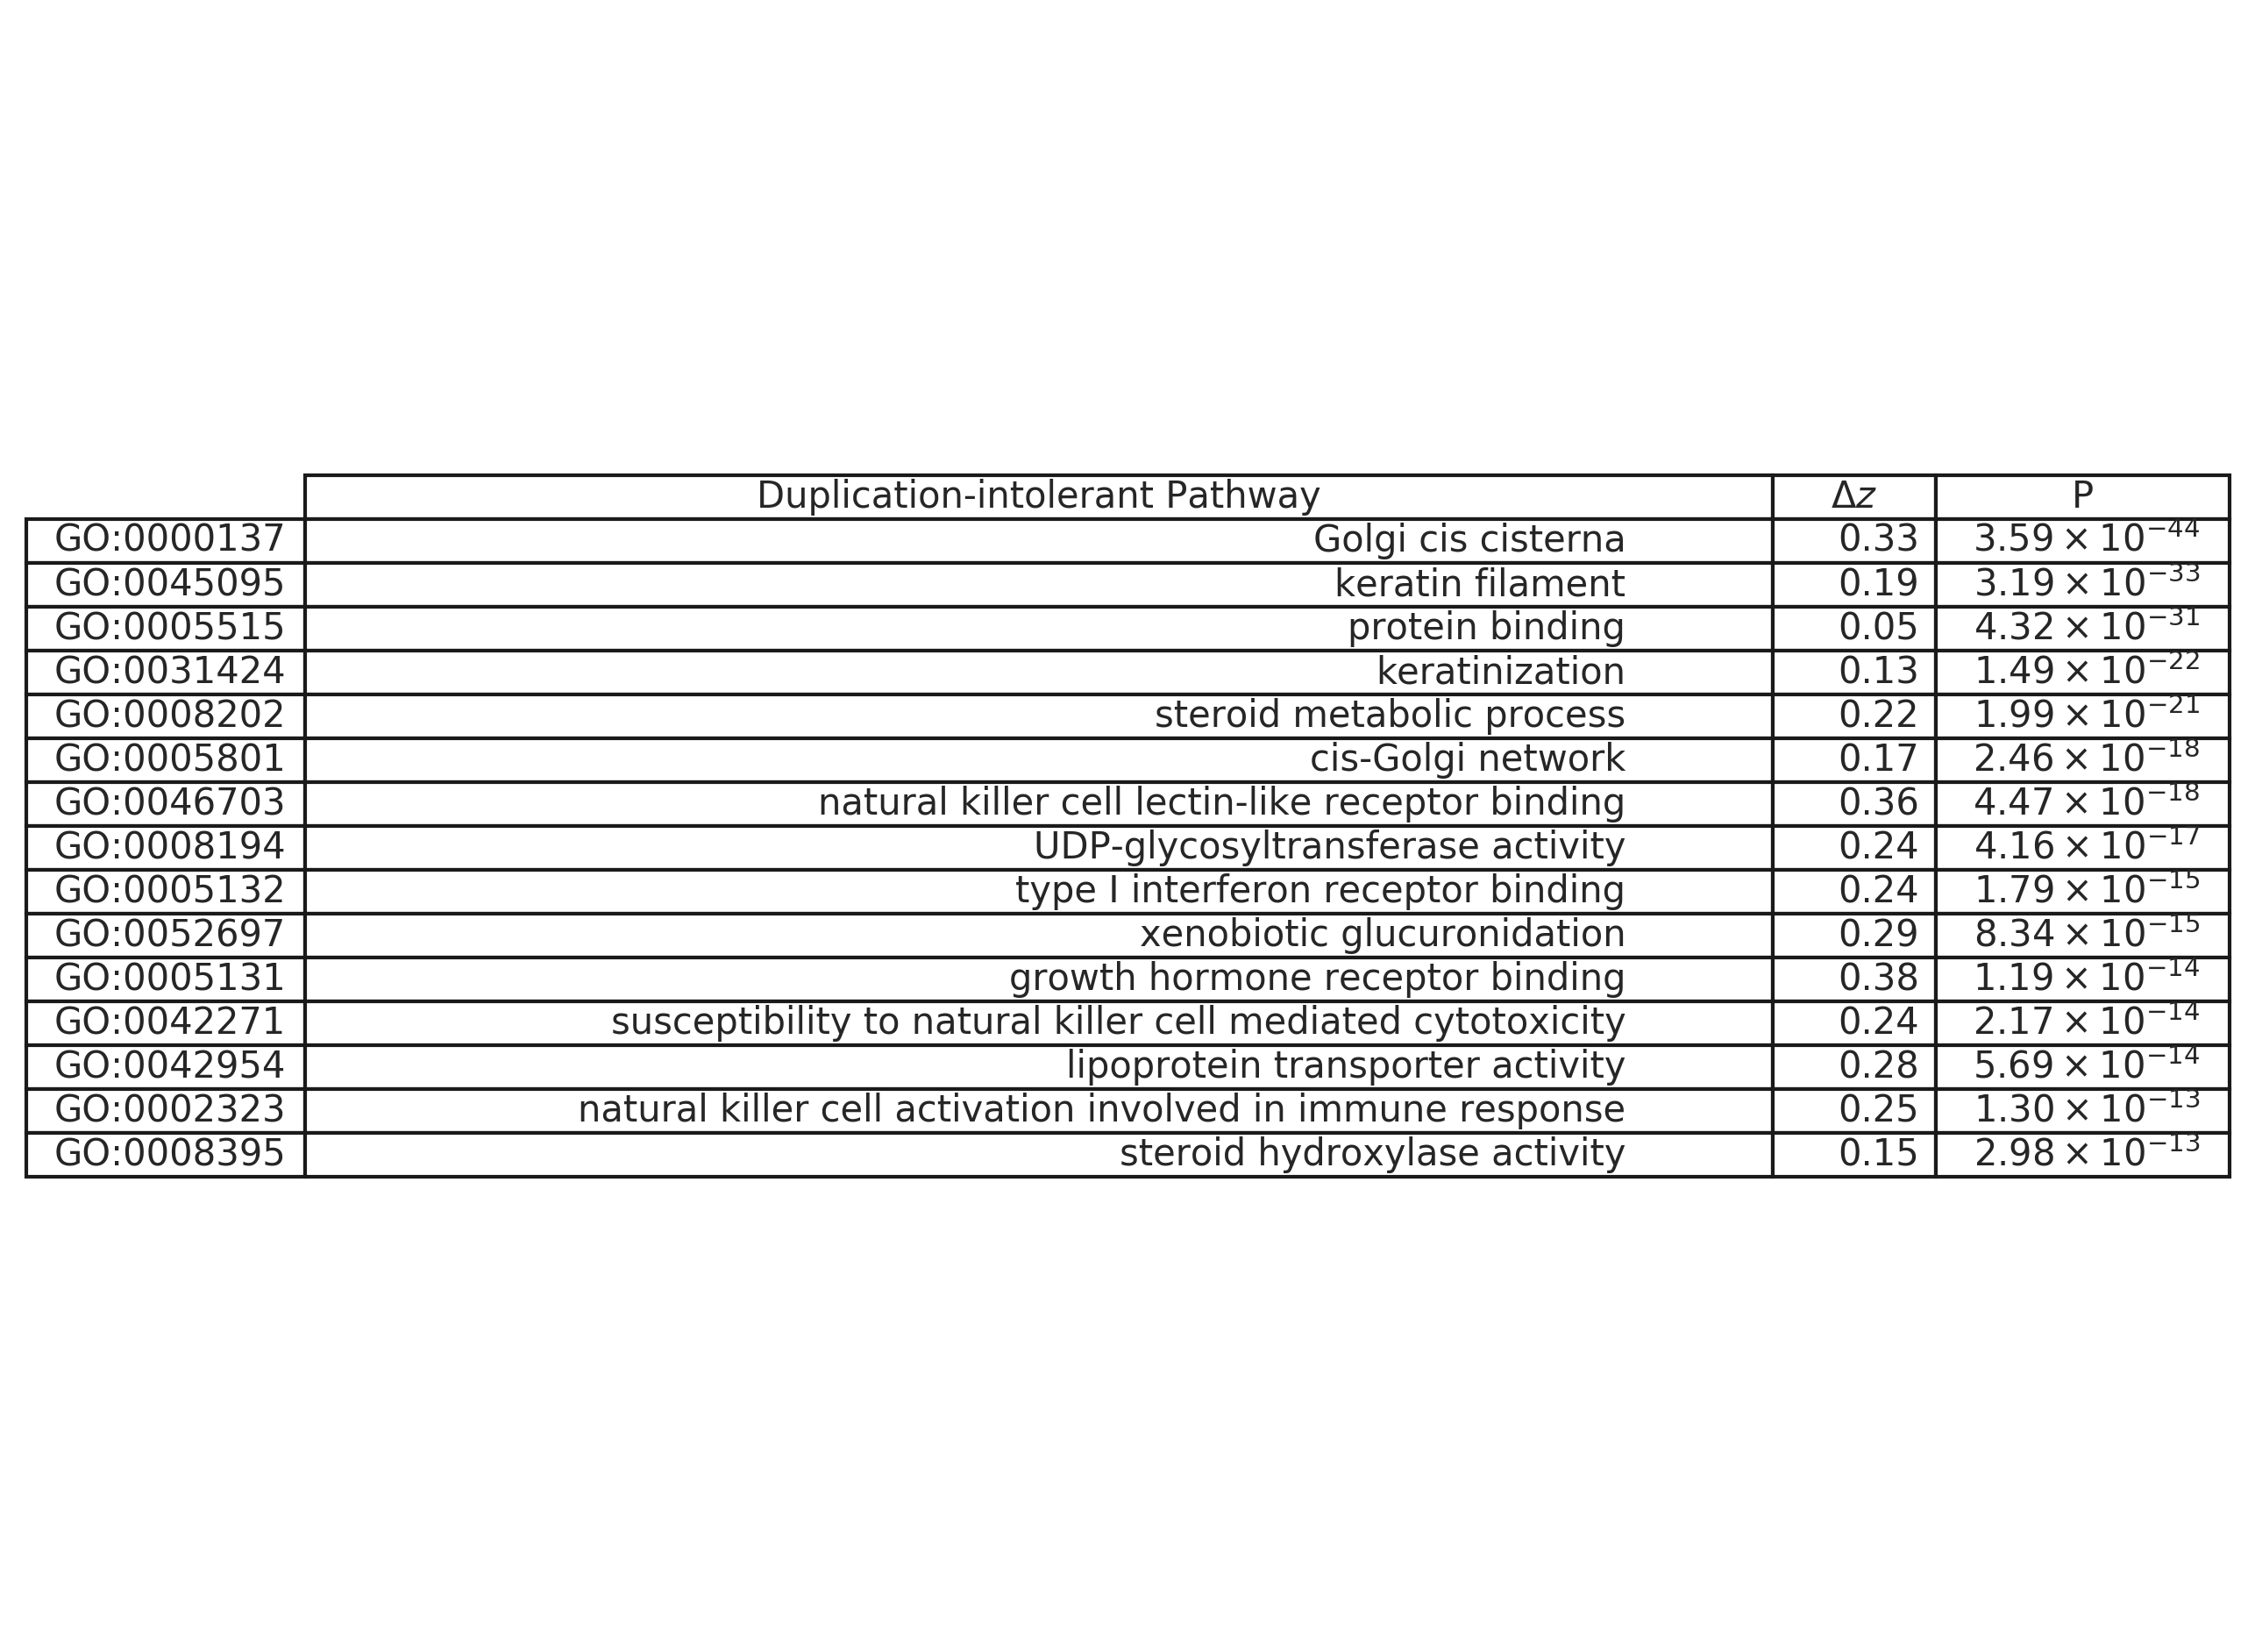

In [14]:
# Table S2b: GO Pathways most intolerant to Duplication

# select pathways with positive constraint and at least 10 genes
path = pd.read_table('../constraint/cnv_dup_go-enrichment_20190430.tsv',
                     header=None, names=['ID', 'BETA', 'P', 'NAME', 'N'], index_col='ID')
top = path.query('N > 9').sort_values('P')[['NAME', 'BETA', 'P']].head(15)

# write to file
top.to_csv('supplement/Table-S2b_dup_go.tsv', sep="\t", header=['Pathway Name', 'Delta z', 'P'])

# display
plt.figure(figsize=(8,8), dpi=300)
tab = plt.table(cellText=map(lambda x:[x[0], '{:.2f}'.format(x[1]), 
                                 '${0:.2f} \\times 10^{{{1}}}$'.format(x[2]*(10**int(1-np.log10(x[2]))), 
                                                                      int(np.log10(x[2]))-1)], 
                             top.values.tolist()),
                rowLabels=top.index,
                colLabels=['Duplication-intolerant Pathway', '$\Delta z$', 'P'],
                colWidths = [0.9, 0.1, 0.18],
                loc='center'
               )
tab.auto_set_font_size(False)
tab.set_fontsize(10)
# tab.scale(8,8)
plt.axis('tight')
plt.axis('off')
plt.xticks([],[])
plt.yticks([],[])
plt.show()

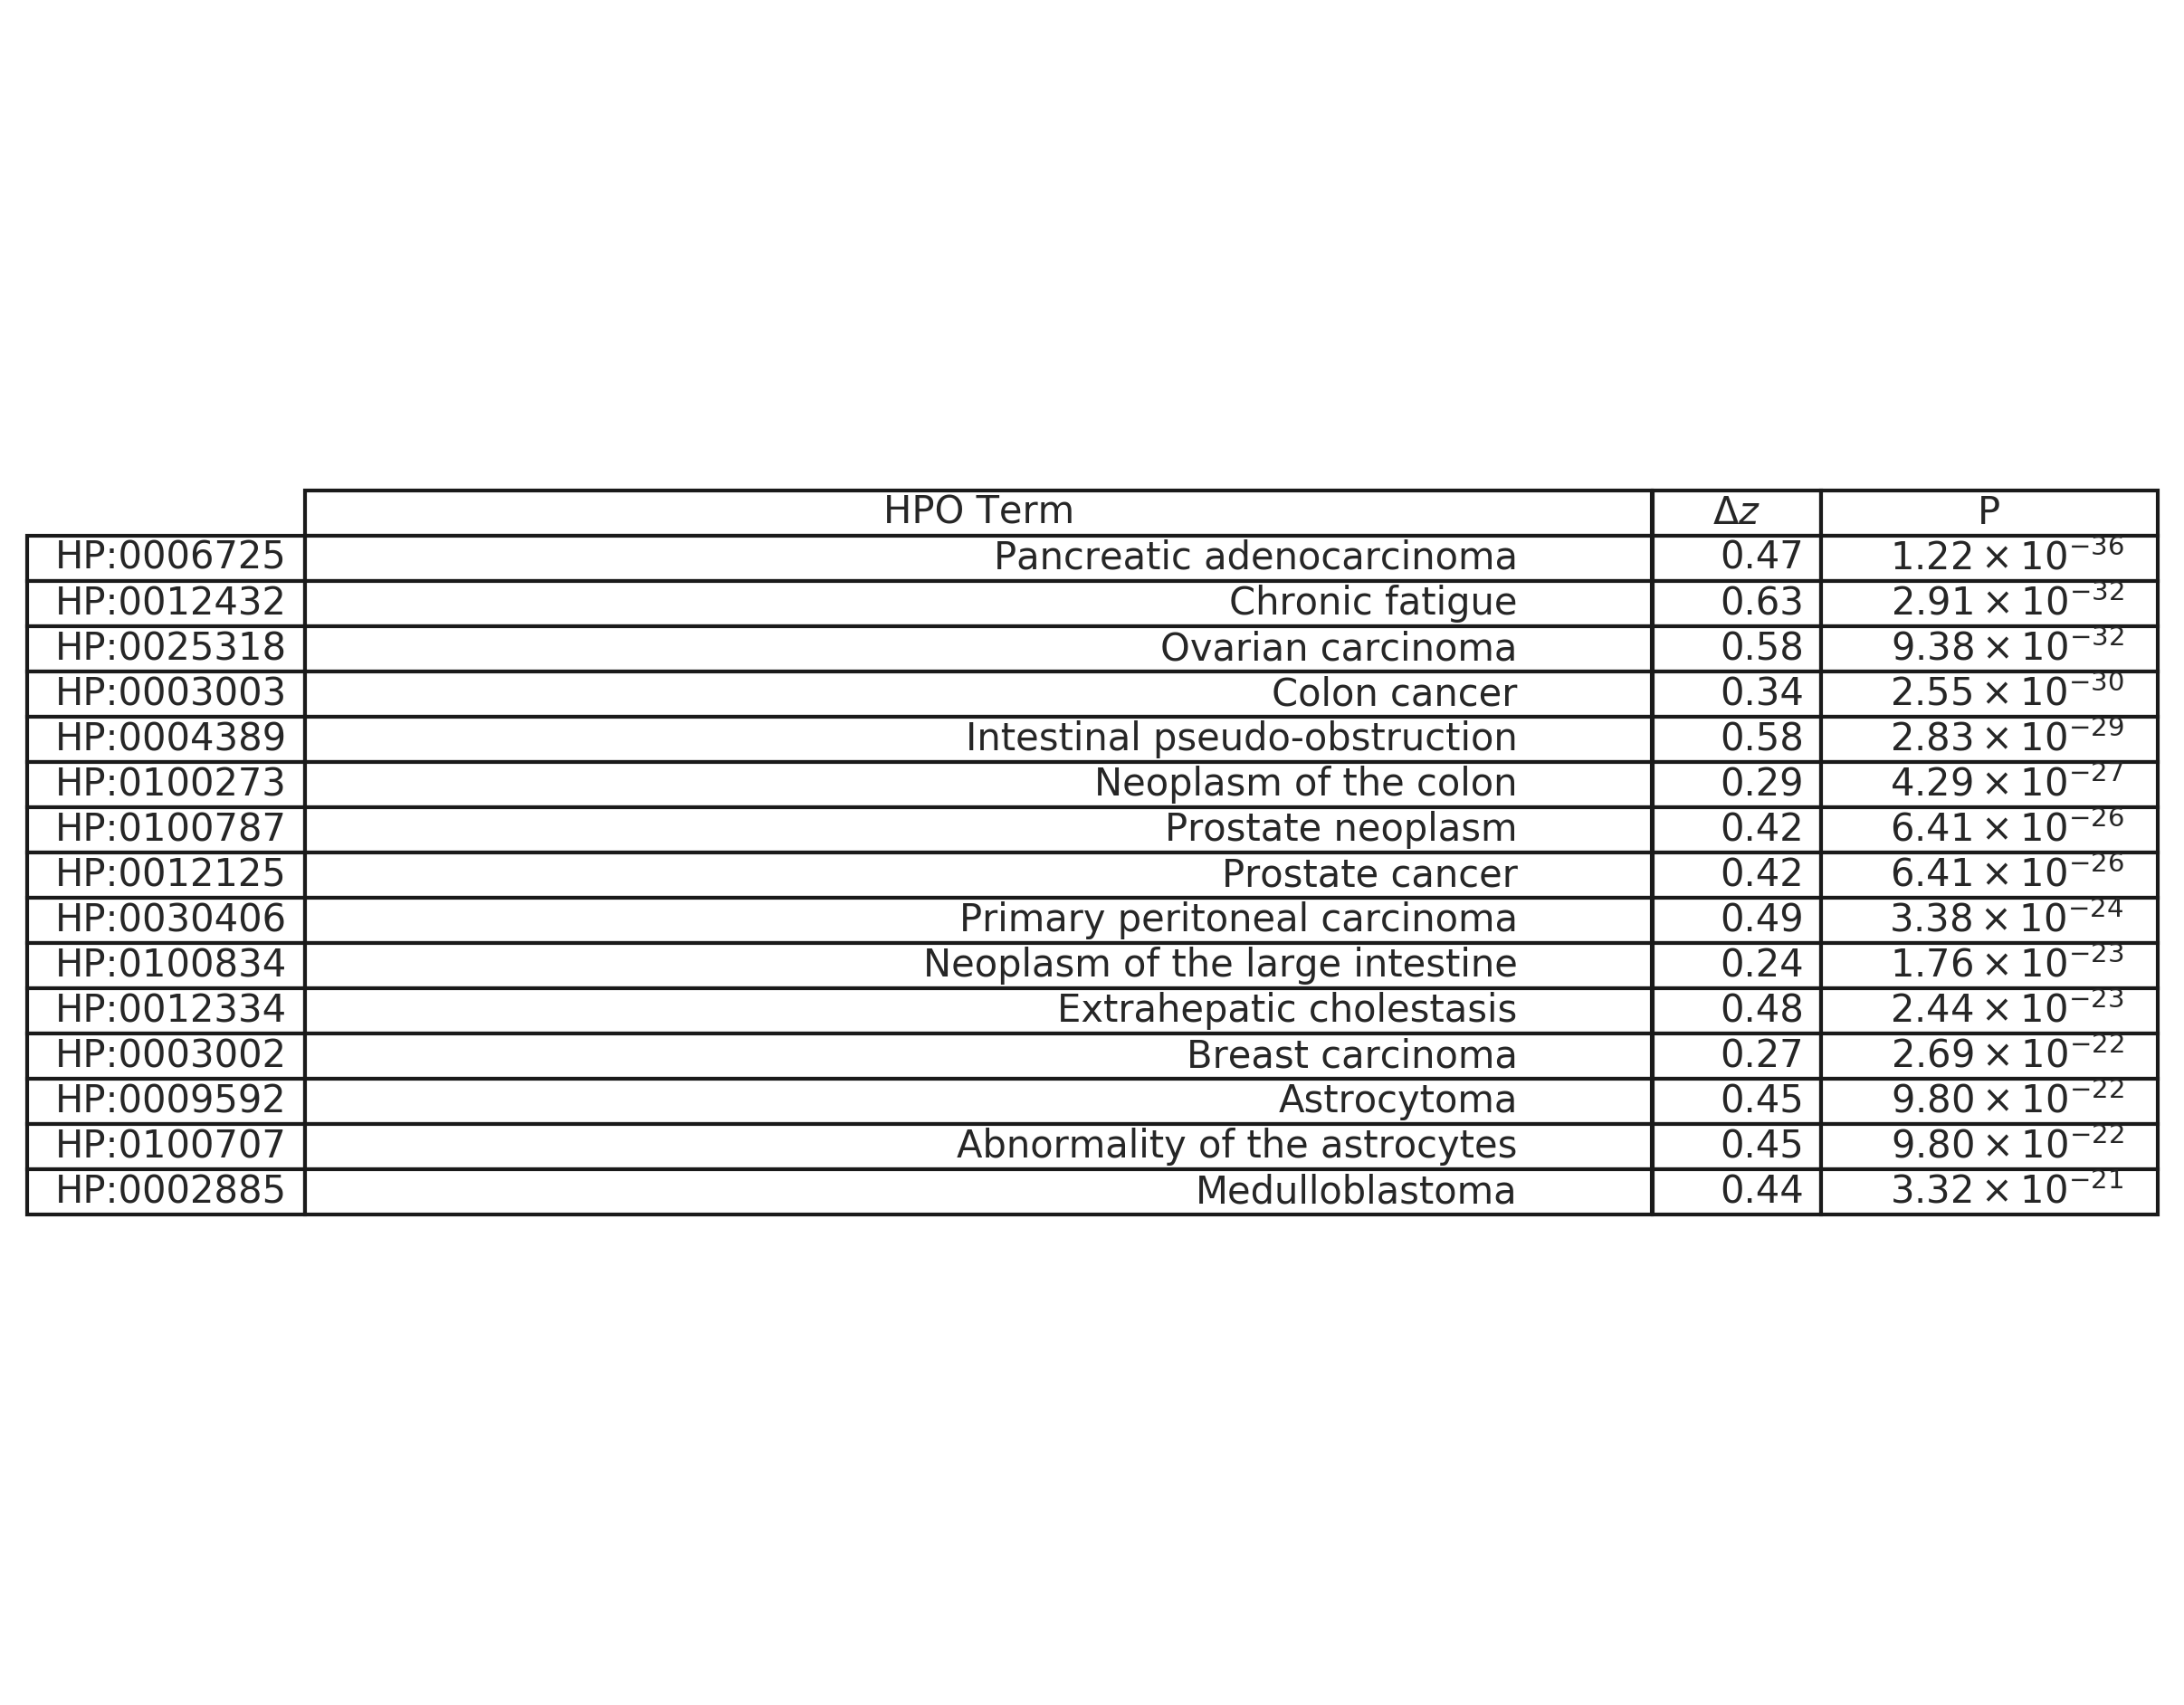

In [15]:
# Table S3a: Most highly constrained HPO Terms to deletion

# select terms with at least 5 genes and positive constraint
path = pd.read_table('../constraint/cnv_del_hpo-enrichment_20190430.tsv',
                     header=None, names=['ID', 'BETA', 'P', 'NAME', 'N'], index_col='ID').dropna()
path[['BETA','P','N']] = path[['BETA','P','N']].astype(float)
path['NAME'] = path['NAME'].apply(lambda s:s.replace('_',' '))
top = path.query('N > 9 and BETA > 0').sort_values('P')[['NAME', 'BETA', 'P']].head(15)

# save to file
top.to_csv('supplement/Table-S3a_del_hpo.tsv', sep="\t", header=['Deletion-intolerant HPO Term', 'Delta z', 'P'])

# display
plt.figure(figsize=(8,8), dpi=300)
tab = plt.table(cellText=map(lambda x:[x[0], '{:.2f}'.format(x[1]), 
                                 '${0:.2f} \\times 10^{{{1}}}$'.format(x[2]*(10**int(1-np.log10(x[2]))), 
                                                                      int(np.log10(x[2]))-1)], 
                             top.values.tolist()),
                rowLabels=top.index,
                colLabels=['HPO Term', '$\Delta z$', 'P'],
                colWidths = [0.8, 0.1, 0.2],
                loc='center',
               )
tab.auto_set_font_size(False)
tab.set_fontsize(10)
# tab.scale(8,8)
plt.axis('tight')
plt.axis('off')
plt.xticks([],[])
plt.yticks([],[])
plt.show()

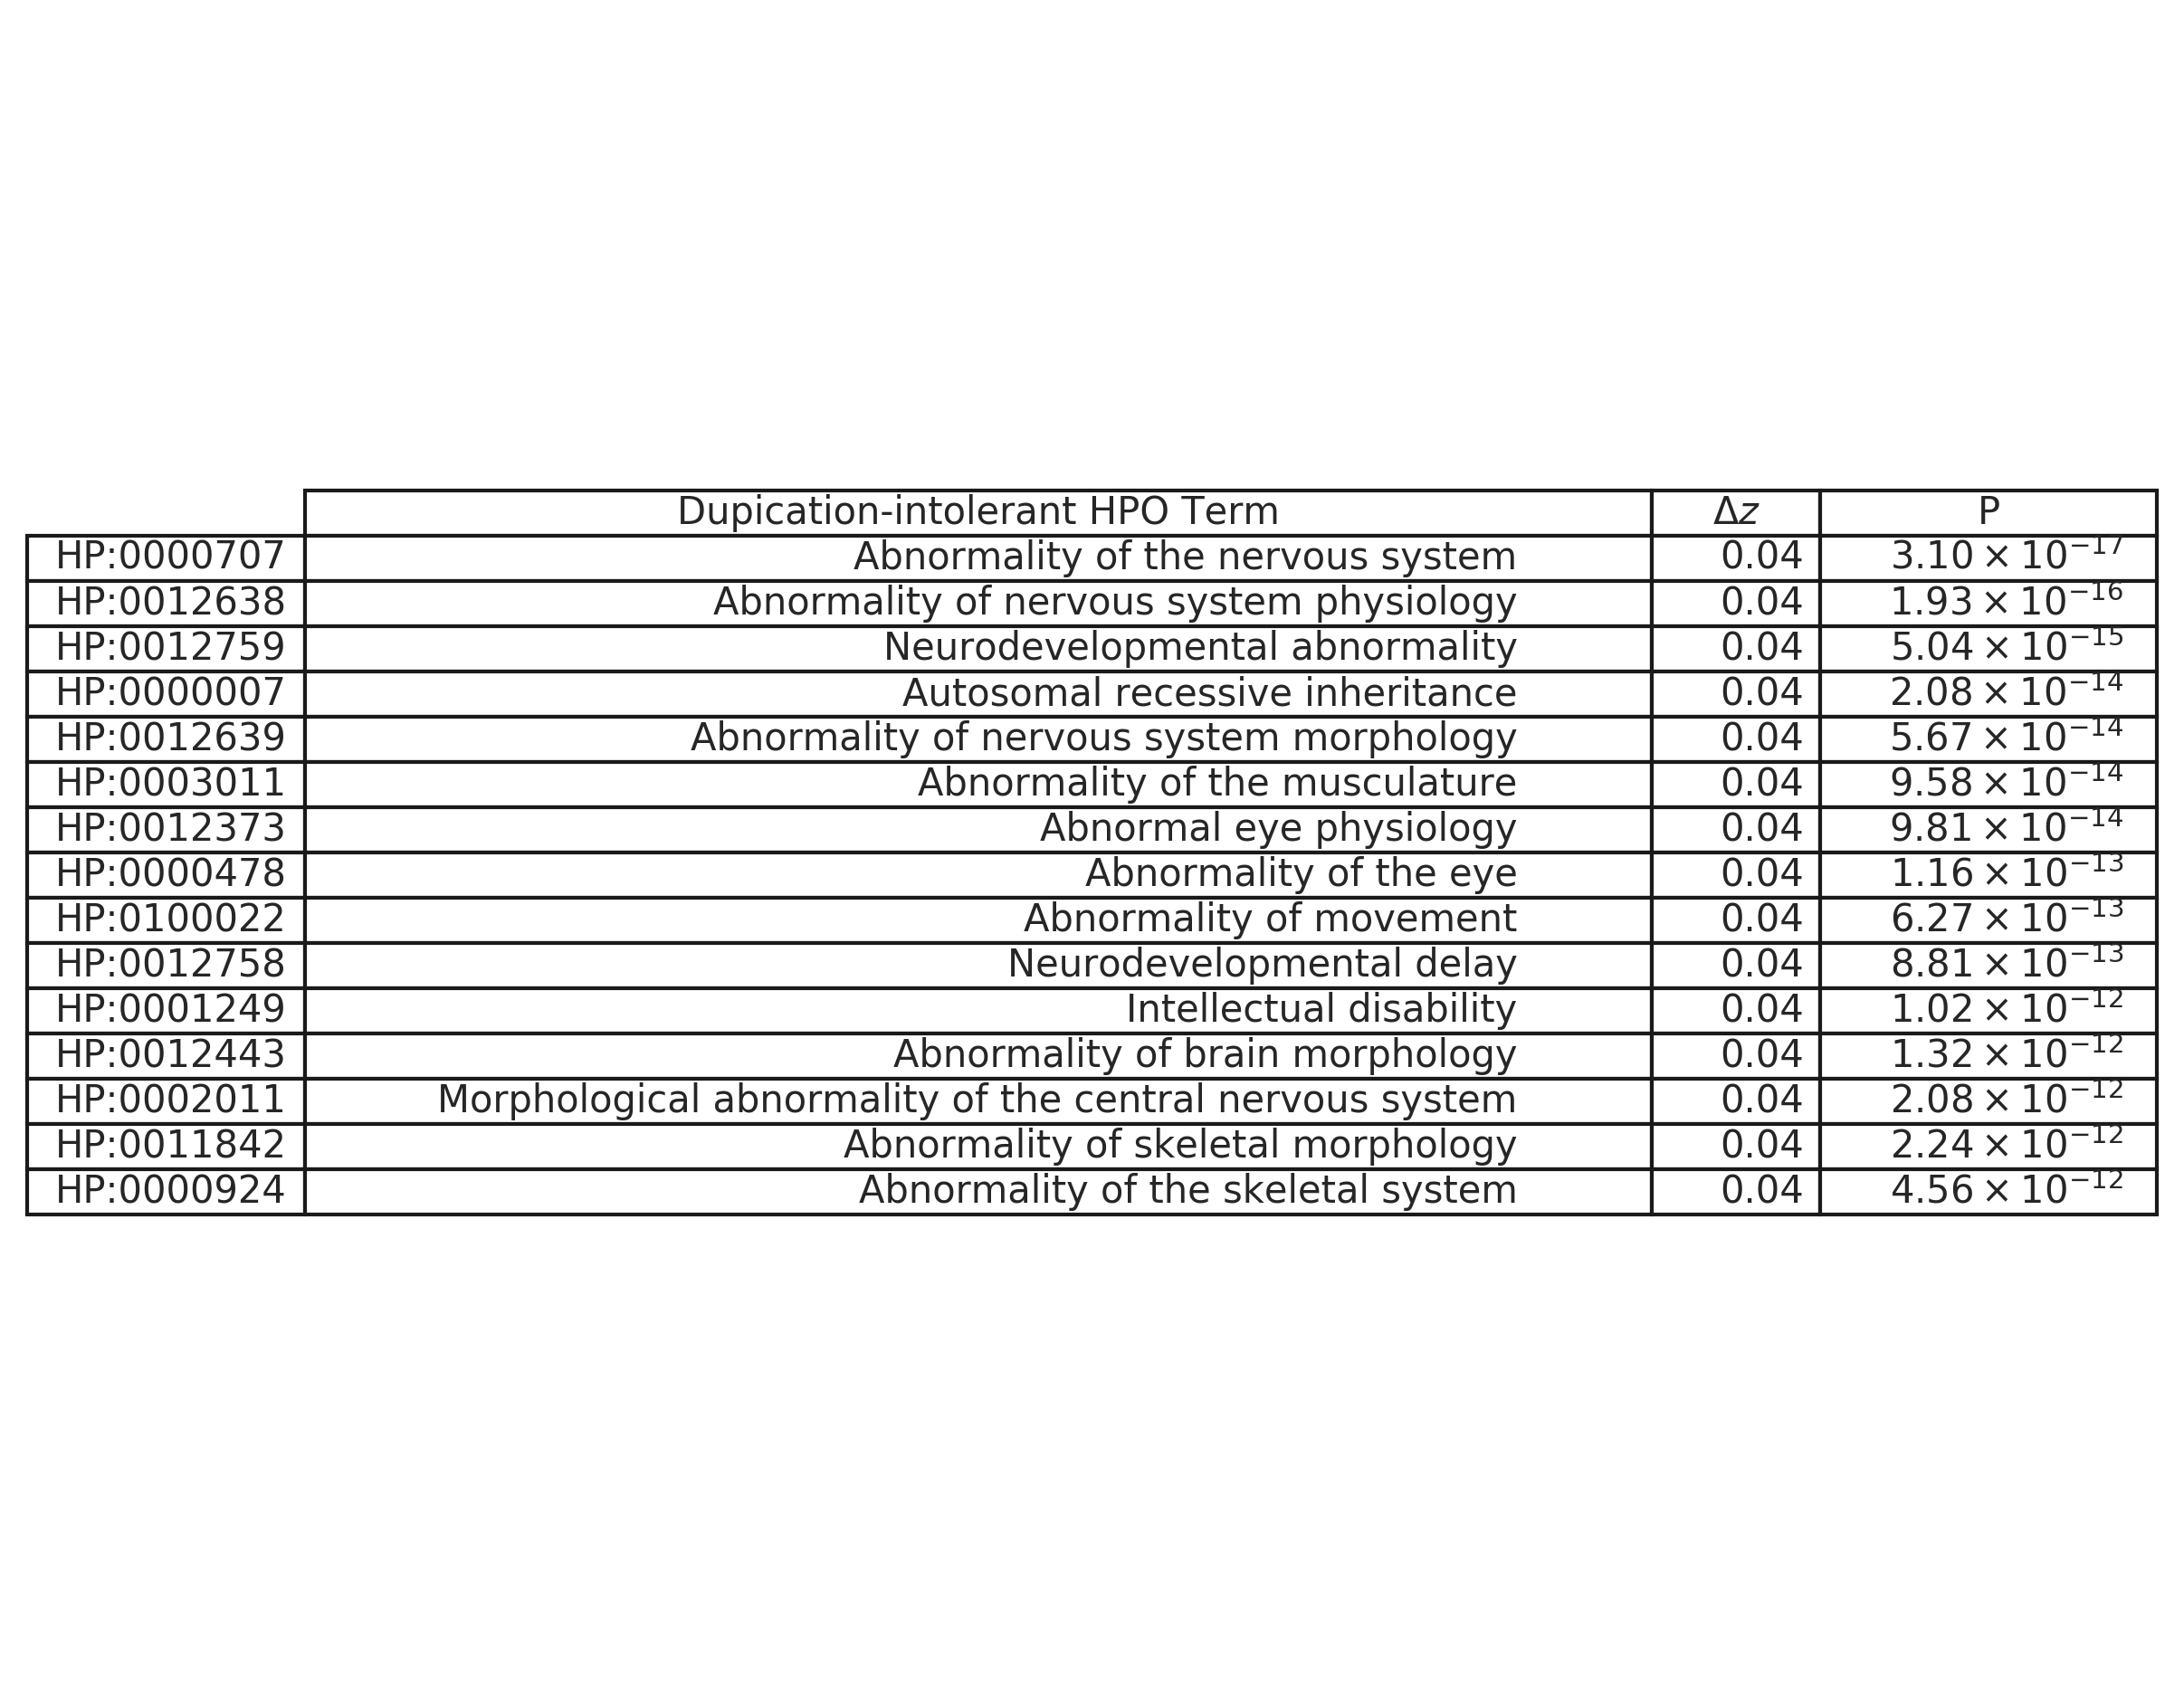

In [16]:
# Table S3b: Most highly constrained HPO Terms to deletion

# select terms with at least 10 genes and positive constraint
path = pd.read_table('../constraint/cnv_dup_hpo-enrichment_20190430.tsv',
                     header=None, names=['ID', 'BETA', 'P', 'NAME', 'N'], index_col='ID').dropna()
path[['BETA','P','N']] = path[['BETA','P','N']].astype(float)
path['NAME'] = path['NAME'].apply(lambda s:s.replace('_',' '))
top = path.query('N > 9 and BETA > 0').sort_values('P')[['NAME', 'BETA', 'P']].head(15)

# save to file
top.to_csv('supplement/Table-S3b_dup_hpo.tsv', sep="\t", header=['HPO Term', 'Delta z', 'P'])

# display
plt.figure(figsize=(8,8), dpi=300)
tab = plt.table(cellText=map(lambda x:[x[0], '{:.2f}'.format(x[1]), 
                                 '${0:.2f} \\times 10^{{{1}}}$'.format(x[2]*(10**int(1-np.log10(x[2]))), 
                                                                      int(np.log10(x[2]))-1)], 
                             top.values.tolist()),
                rowLabels=top.index,
                colLabels=['Dupication-intolerant HPO Term', '$\Delta z$', 'P'],
                colWidths = [0.8, 0.1, 0.2],
                loc='center',
               )
tab.auto_set_font_size(False)
tab.set_fontsize(10)
# tab.scale(8,8)
plt.axis('tight')
plt.axis('off')
plt.xticks([],[])
plt.yticks([],[])
plt.show()